# Week 2

As explained in Lecture 1, each week of this class is a Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

## Today

This lecture covers:

1. **Principles of good visualization**: We'll watch a video on what makes plots effective and create your own checklist.
2. **Merging messy real-world datasets**: You'll combine SF crime data from two different time periods (2003-2018 and 2018-present) that use different schemas and categories. This is one of the most common and frustrating tasks in data science.
3. **Temporal pattern analysis**: Using your merged 20+ year dataset, you'll explore crime patterns across years, months, weekdays, and hours.
4. **Advanced visualization techniques**: You'll experiment with calendar plots, polar charts, and time series visualizations.

By the end, you'll have a unified crime dataset spanning two decades and the skills to wrangle similarly messy data in your future work.

# Part 1: Creating nice plots

Ok. There's a lot of barcharts today. We need them ... they are a fantastic tool for data exploration. But it can get monotonous, so let's take a little break to talk about something else before digging deeper with the barcharts.

I want to tell you a bit about how to make nice plots. I do that in the video below

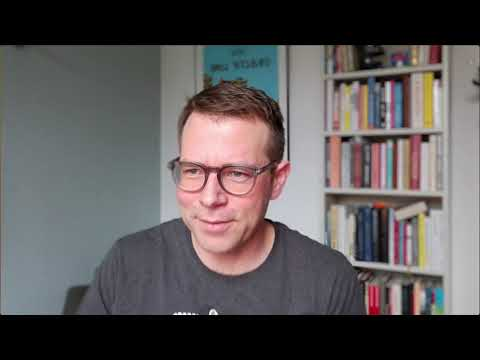

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('9hIu4pgJXQc', width=800, height=450)

> **Exercise 1.1**: Nice plots
>
> * Create a list of 10 rules for nice plots based on the video.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Answer in your own words, do your own research, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to refine your writing.
</div>

1. Make sure labels are readable
2. What are the label chart showing, being more meaningful
3. x-axis should be meaningful, use ranges that makes sense
4. y-axis should be meaningful, use ranges that makes sense
5. Zoom level, should make sense
6. Subplots should have comparable axises
7. Data-ink: the non-erasble core of a graphic
    7.1 Data-ink ratio = data-ink / total ink used to print the graphic
8. Less is more
9. Captions are nice
10. Fonts

# Part 2: Merging Historical and Recent Crime Data

So far we've been working with crime data from 2018 onwards (I will assume you have that file, named something like "Police Department Incident Reports 2018 to Present"). But San Francisco has published crime data going all the way back to 2003! Having access to this longer time series would let us:
- Study long-term trends in crime
- See how crime patterns changed before, during, and after major events
- Have more statistical power for our analyses

The catch? **The two datasets don't have the same structure.** This is an incredibly common situation in data science. Organizations change how they record data over time, different departments use different formats, and merging datasets requires careful thought.

### Why This Matters

In the real world, you'll almost never get a single, clean dataset that answers your question. Instead, you'll need to combine data from multiple sources: different time periods, different departments, different organizations. Each source will have its own quirks, naming conventions, and missing values.

This is also directly relevant to algorithmic accountability. Remember the Richardson et al. reading from Week 1? They argued that "dirty data" undermines predictive policing. But what counts as "dirty"? If crime categories change over time—if `DRUNKENNESS` disappears as a category in 2018—does that mean public intoxication stopped? Or just that we can't track it anymore? These are the kinds of questions you need to ask whenever you merge datasets.

The skills you'll practice here—schema mapping, category matching, validation—are foundational for any serious data work.

## Step 2.1: Understand both schemas

> **Mini Exercise**: Schema exploration
>
> Download the historical dataset "Police Department Incident Reports: Historical 2003 to May 2018" from SF OpenData (or use the file provided).
>
> * Load both datasets and examine their columns
> * Which columns appear in both datasets (perhaps with different names)?
> * Which columns are unique to each dataset?
> * Create a "mapping" showing which columns in the historical data correspond to which columns in the recent data

Here's a starter to help you think about the mapping:

| Information | Historical Column | Recent Column |
|-------------|------------------|---------------|
| Crime type | `Category` | `Incident Category` |
| Police district | `PdDistrict` | `Police District` |
| Date | `Date` | `Incident Date` |
| ... | ... | ... |

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> You should be able to do this no problem in pandas, but if you find it tough, feel free to ask an LLM for help.
</div>

In [10]:
import pandas as pd

# df = pd.read_csv("../Week1/Police_Department_Incident_Reports__2018_to_Present_20260203.csv")
df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20260210.csv")
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,data_loaded_at
0,16020415607021,160204156,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Thursday,03/03/2016,19:30,TARAVAL,NONE,100 Block of BEPLER ST,-122.463545,37.707968,POINT (-122.463545017 37.707968365),2025/06/20 12:17:56 PM
1,13011910904134,130119109,4134,ASSAULT,BATTERY,Sunday,02/10/2013,18:09,MISSION,NONE,900 Block of DOLORES ST,-122.425237,37.754222,POINT (-122.425236707 37.754222191),2025/06/20 12:17:56 PM
2,6102672004134,61026720,4134,ASSAULT,BATTERY,Monday,09/25/2006,22:15,NORTHERN,NONE,400 Block of FULTON ST,-122.425839,37.778486,POINT (-122.42583948 37.778486375),2025/06/20 12:17:56 PM
3,11049313327195,110493133,27195,TRESPASS,TRESPASSING,Sunday,06/19/2011,13:06,TARAVAL,NONE,100 Block of APTOS AV,-122.466758,37.729185,POINT (-122.466758005 37.72918458),2025/06/20 12:17:56 PM
4,8074906804134,80749068,4134,ASSAULT,BATTERY,Friday,05/23/2008,12:10,NORTHERN,NONE,300 Block of FELL ST,-122.423582,37.775904,POINT (-122.423581857 37.775904267),2025/06/20 12:17:56 PM


Info = Category + Incidient Category
Crime description = Description + Incident Description
Day of week = DayOfWeek + Incident Day of Week
Date = Date + Incident Date
Time = Time + Incident Time
Police district  = PdDistrict + Police District
Resolution status = Resolution + Resolution
X cord = X + Longitude
Y cord = Y + Latitude
Location point = location + Point
Data loaded timestamp = data_kiaded_at + data_loaded_at

### Recent Data (2018-Present)
Row ID,
Incident Datetime (combines date + time),
Incident Year,
Report Datetime,
Incident ID,
Incident Number,
CAD Number,
Report Type Code,
Report Type Description,
Filed Online,
Incident Code,
CNN,
Analysis Neighborhood,
Supervisor District,
Supervisor District 2012,
data_as_of

### Historical Data (2003-2018)
PdId,
IncidntNum,
Incident Code,
Address

| Information | Historical Column | Recent Column |
|-------------|------------------|---------------|
| Crime type | `Category` | `Incident Category` |
| Crime description | `Descript` | `Incident Description` |
| Day of week | `DayOfWeek` | `Incident Day of Week` |
| Date | `Date` | `Incident Date` |
| Time | `Time` | `Incident Time` |
| Police district | `PdDistrict` | `Police District` |
| Resolution status | `Resolution` | `Resolution` |
| Latitude | `Y` | `Latitude` |
| Longitude | `X` | `Longitude` |
| Location point | `location` | `Point` |
| Data loaded timestamp | `data_loaded_at` | `data_loaded_at` |

## Step 2.2: Identify the common ground

> **Mini Exercise**: Essential columns
>
> * For the analyses we've have been doing (crime categories, time patterns, police districts), and *will be doing in future lectures* (**mapping GPS points**) which columns do we need?
> * Make a list of the essential/potentially interesting columns and their names in each dataset
> * Check the data types — are dates stored the same way? Are coordinates in the same format?
> * Handle any format differences (hint: look carefully at how dates are formatted in each file)

1. Pd district, Date, Time, Category, X, Y

2. 
Historical: Location, categotry, Date, Address
Recent: Point, Incident category, Incident Date and Time

3. 

In [11]:
import pandas as pd

# Load both datasets
historical = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20260210.csv")
recent = pd.read_csv("../Week1/Police_Department_Incident_Reports__2018_to_Present_20260203.csv")

# Check data types and sample data
print("=== HISTORICAL DATA ===")
print("\nData types:")
print(historical[['Date', 'Time', 'Category', 'PdDistrict', 'X', 'Y']].dtypes)
print("\nSample values:")
print(historical[['Date', 'Time', 'Category', 'PdDistrict', 'X', 'Y']].head())

print("\n=== RECENT DATA ===")
print("\nData types:")
print(recent[['Incident Date', 'Incident Time', 'Incident Category', 'Police District', 'Latitude', 'Longitude']].dtypes)
print("\nSample values:")
print(recent[['Incident Date', 'Incident Time', 'Incident Category', 'Police District', 'Latitude', 'Longitude']].head())

=== HISTORICAL DATA ===

Data types:
Date           object
Time           object
Category       object
PdDistrict     object
X             float64
Y             float64
dtype: object

Sample values:
         Date   Time       Category PdDistrict           X          Y
0  03/03/2016  19:30  VEHICLE THEFT    TARAVAL -122.463545  37.707968
1  02/10/2013  18:09        ASSAULT    MISSION -122.425237  37.754222
2  09/25/2006  22:15        ASSAULT   NORTHERN -122.425839  37.778486
3  06/19/2011  13:06       TRESPASS    TARAVAL -122.466758  37.729185
4  05/23/2008  12:10        ASSAULT   NORTHERN -122.423582  37.775904

=== RECENT DATA ===

Data types:
Incident Date         object
Incident Time         object
Incident Category     object
Police District       object
Latitude             float64
Longitude            float64
dtype: object

Sample values:
  Incident Date Incident Time Incident Category Police District   Latitude  \
0    2025/10/31         17:55      Drug Offense         Mission  

Dates: Historical likely uses MM/DD/YYYY while Recent uses YYYY-MM-DD

Times: Both probably HH:MM:SS format, but verify

Coordinates: Historical uses State Plane coordinates (X, Y) while Recent uses standard latitude/longitude

## Essential Columns for Analysis

**For crime categories, time patterns, police districts, and GPS mapping:**

| Purpose | Historical Column | Recent Column | Data Type | Format/Notes |
|---------|-------------------|---------------|-----------|--------------|
| Crime category | `Category` | `Incident Category` | object (string) | **Case difference**: ALL CAPS vs Title Case — normalize with `.str.upper()` |
| Police district | `PdDistrict` | `Police District` | object (string) | Consistent naming within each dataset |
| Date | `Date` | `Incident Date` | object (string) | **Format difference**: MM/DD/YYYY vs YYYY-MM-DD — must parse with pandas |
| Time | `Time` | `Incident Time` | object (string) | Both HH:MM:SS format — consistent |
| Latitude | `Y` | `Latitude` | float64 | **Coordinate system difference**: Historical uses Y as latitude, Recent uses standard Latitude |
| Longitude | `X` | `Longitude` | float64 | **Coordinate system difference**: Historical uses X as longitude, Recent uses standard Longitude |

### Key Format Differences to Handle:

1. **Dates**: 
   - Historical: `MM/DD/YYYY` (e.g., `03/03/2016`)
   - Recent: `YYYY-MM-DD` (check your output)
   - **Action**: Convert both to datetime with `pd.to_datetime()`

2. **Case sensitivity**:
   - Historical `Category`: ALL CAPS (e.g., `VEHICLE THEFT`, `ASSAULT`)
   - Recent `Incident Category`: Title Case (e.g., `Vehicle Theft`, `Assault`)
   - **Action**: Standardize using `.str.upper()` before merging

3. **Coordinates** (for mapping):
   - Historical: `X` (longitude) and `Y` (latitude) as float64 — these appear to be standard decimal degrees
   - Recent: `Latitude` and `Longitude` with some missing values (NaN)
   - **Action**: Both are already in lat/lon format, no conversion needed

4. **Missing data**:
   - Recent data has missing Longitude values (NaN) — will need to handle during merge

### Summary of Standardization Steps:

Before merging, you'll need to:
1. Parse dates: `pd.to_datetime(historical['Date'], format='%m/%d/%Y')`
2. Standardize categories: `historical['Category'].str.upper()`
3. Rename columns to match
4. Handle missing coordinates in recent data
5. Concatenate datasets
6. Remove duplicates from May 2018 overlap period

In [12]:
# Parse and standardize dates across both datasets

# HISTORICAL DATA - MM/DD/YYYY format
historical['Date'] = pd.to_datetime(historical['Date'], format='%m/%d/%Y')

# RECENT DATA - check and parse
# First, let's see what format we have
print("Sample recent dates:")
print(recent['Incident Date'].head(10))
print("\nRecent date dtype before:", recent['Incident Date'].dtype)

# Parse recent dates - likely YYYY-MM-DD but let pandas infer
recent['Incident Date'] = pd.to_datetime(recent['Incident Date'])

print("\nAfter conversion:")
print("Historical date dtype:", historical['Date'].dtype)
print("Recent date dtype:", recent['Incident Date'].dtype)

print("\nSample historical dates after parsing:")
print(historical[['Date', 'Time', 'Category']].head())

print("\nSample recent dates after parsing:")
print(recent[['Incident Date', 'Incident Time', 'Incident Category']].head())

# Standardize category case - convert to uppercase for comparison
historical['Category'] = historical['Category'].str.upper()
recent['Incident Category'] = recent['Incident Category'].str.upper()

print("\n=== CATEGORIES NOW STANDARDIZED ===")
print("Historical unique categories (first 10):")
print(historical['Category'].unique()[:10])
print("\nRecent unique categories (first 10):")
print(recent['Incident Category'].unique()[:10])

Sample recent dates:
0    2025/10/31
1    2025/06/13
2    2025/11/03
3    2025/05/21
4    2025/10/23
5    2026/01/08
6    2025/06/11
7    2025/06/12
8    2025/05/23
9    2025/06/13
Name: Incident Date, dtype: object

Recent date dtype before: object

After conversion:
Historical date dtype: datetime64[ns]
Recent date dtype: datetime64[ns]

Sample historical dates after parsing:
        Date   Time       Category
0 2016-03-03  19:30  VEHICLE THEFT
1 2013-02-10  18:09        ASSAULT
2 2006-09-25  22:15        ASSAULT
3 2011-06-19  13:06       TRESPASS
4 2008-05-23  12:10        ASSAULT

Sample recent dates after parsing:
  Incident Date Incident Time Incident Category
0    2025-10-31         17:55      Drug Offense
1    2025-06-13         12:41           Assault
2    2025-11-03         14:00           Warrant
3    2025-05-21         00:00     Larceny Theft
4    2025-10-23         00:00     Larceny Theft

=== CATEGORIES NOW STANDARDIZED ===
Historical unique categories (first 10):
['VEHIC

## Step 2.3: The Category Problem

This is where things get tricky (but interesting). The crime categories in the two datasets are **not the same**.

> **Mini Exercise**: Explore the category differences
>
> * List all unique categories in each dataset
> * How many categories are in the historical data? How many in the recent data?
> * Which categories appear to match (even if the names are slightly different)?
> * Which categories exist in one dataset but not the other?

In [14]:
# Get all unique categories in each dataset
# Filter out NaN values before sorting
historical_categories = sorted([cat for cat in historical['Category'].unique() if pd.notna(cat)])
recent_categories = sorted([cat for cat in recent['Incident Category'].unique() if pd.notna(cat)])

print("=" * 60)
print(f"HISTORICAL DATA: {len(historical_categories)} unique categories")
print("=" * 60)
for cat in historical_categories:
    print(f"  {cat}")

print("\n" + "=" * 60)
print(f"RECENT DATA: {len(recent_categories)} unique categories")
print("=" * 60)
for cat in recent_categories:
    print(f"  {cat}")

print("\n" + "=" * 60)
print("CATEGORIES IN BOTH DATASETS:")
print("=" * 60)
common = set(historical_categories) & set(recent_categories)
for cat in sorted(common):
    print(f"  {cat}")

print("\n" + "=" * 60)
print("CATEGORIES ONLY IN HISTORICAL:")
print("=" * 60)
only_hist = set(historical_categories) - set(recent_categories)
for cat in sorted(only_hist):
    print(f"  {cat}")

print("\n" + "=" * 60)
print("CATEGORIES ONLY IN RECENT:")
print("=" * 60)
only_recent = set(recent_categories) - set(historical_categories)
for cat in sorted(only_recent):
    print(f"  {cat}")

HISTORICAL DATA: 37 unique categories
  ARSON
  ASSAULT
  BAD CHECKS
  BRIBERY
  BURGLARY
  DISORDERLY CONDUCT
  DRIVING UNDER THE INFLUENCE
  DRUG/NARCOTIC
  DRUNKENNESS
  EMBEZZLEMENT
  EXTORTION
  FORGERY/COUNTERFEITING
  FRAUD
  GAMBLING
  KIDNAPPING
  LARCENY/THEFT
  LIQUOR LAWS
  LOITERING
  MISSING PERSON
  NON-CRIMINAL
  OTHER OFFENSES
  PORNOGRAPHY/OBSCENE MAT
  PROSTITUTION
  RECOVERED VEHICLE
  ROBBERY
  SECONDARY CODES
  SEX OFFENSES, FORCIBLE
  SEX OFFENSES, NON FORCIBLE
  STOLEN PROPERTY
  SUICIDE
  SUSPICIOUS OCC
  TREA
  TRESPASS
  VANDALISM
  VEHICLE THEFT
  WARRANTS
  WEAPON LAWS

RECENT DATA: 49 unique categories
  ARSON
  ASSAULT
  BURGLARY
  CASE CLOSURE
  CIVIL SIDEWALKS
  COURTESY REPORT
  DISORDERLY CONDUCT
  DRUG OFFENSE
  DRUG VIOLATION
  EMBEZZLEMENT
  FIRE REPORT
  FORGERY AND COUNTERFEITING
  FRAUD
  GAMBLING
  HOMICIDE
  HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS
  HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE
  HUMAN TRAFFICKING, COMMERCIAL SEX ACTS
  LARC

### Intermezzo: The many flavors of category mismatch

Here are some concrete problems you'll discover:

**Problem 1: Case and formatting differences**

The historical data uses ALL CAPS (`ASSAULT`, `BURGLARY`) while the recent data uses Title Case (`Assault`, `Burglary`). This is easy to fix with `.str.upper()` or `.str.lower()`.

**Problem 2: Name changes**

Some categories look like they were simply renamed:
- `VEHICLE THEFT` → `Motor Vehicle Theft`

**Problem 3: Categories that split or merged**

This is trickier. For example:
- The historical `SEX OFFENSES` might correspond to multiple recent categories: `Sex Offense`, `Rape`, `Human Trafficking`
- The recent data has both `Drug Offense` and `Drug Violation` — should these both map to the historical `DRUG/NARCOTIC`?
- `VANDALISM` in historical data — is that `Vandalism` or `Malicious Mischief` in the recent data? Or both?

**Problem 4: Categories that disappeared or appeared**
- `DRUNKENNESS` exists in historical data but not in recent — was it merged into something else? Decriminalized? Maybe Google it or ask an LLM.
- `Traffic Collision` exists in recent data but not historical — is this a new category, or was it previously recorded differently?
- `Human Trafficking` appears in recent data — is this genuinely new, or was it previously categorized under something else?

**Problem 5: Ambiguous mappings**

Sometimes it's genuinely unclear how categories should map. Does historical `WEAPON LAWS` correspond to recent `Weapons Offense`, `Weapons Carrying Etc`, or both? Without detailed documentation (which often doesn't exist), you have to make judgment calls.

## Step 2.4: Solving the category problem

There are two ways that I can think of to approach this matching problem:

**Approach A: Manual inspection**

Look at both lists carefully and create mappings based on your judgment. 

**Approach B: Use an LLM to help**

LLMs have broad background knowledge about crime categories, legal terminology, and how classification systems work. I think that they might be surprisingly helpful here.

> **Exercise 2.1**: LLM-assisted category matching
>
> Try asking an LLM to help you match categories. Here's a suggested approach:
>
> 1. Give the LLM both lists of categories
> 2. Ask it to suggest which categories likely correspond to each other
> 3. Ask it to explain *why* it thinks certain categories match (this helps you evaluate its suggestions)
> 4. Ask it to flag any ambiguous cases where human judgment is needed
>
> **Important**: Don't blindly trust the LLM's suggestions! Use them as a starting point, then verify as described below.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> This is a <i>great</i> use case for LLMs — they have background knowledge about how crime categories work and can spot likely matches faster than manual inspection. But remember: the LLM is making educated guesses based on names. Always verify its suggestions against actual data when possible (see below).
</div>

### The crucial last step: Data-driven validation

Even after creating a mapping, you should validate it:
- For categories you've matched, do the counts make sense? If `VANDALISM` mapped to `Malicious Mischief`, do you see roughly similar numbers of incidents per year?
- Look at the transition year (2018) — if your mapping is correct, the yearly/monthly trend should make sense. A sudden jump or drop suggests a mapping problem.

### LLM-Assisted Category Mapping Analysis

Based on the category lists above, here are suggested mappings organized by confidence level:

## HIGH CONFIDENCE MATCHES

These categories have clear direct matches or simple name changes:

| Historical | Recent | Reasoning |
|------------|--------|-----------|
| ASSAULT | ASSAULT | Exact match |
| ARSON | ARSON | Exact match |
| BURGLARY | BURGLARY | Exact match |
| ROBBERY | ROBBERY | Exact match |
| VANDALISM | VANDALISM | Exact match |
| DISORDERLY CONDUCT | DISORDERLY CONDUCT | Exact match |
| EMBEZZLEMENT | EMBEZZLEMENT | Exact match |
| FRAUD | FRAUD | Exact match |
| GAMBLING | GAMBLING | Exact match |
| LIQUOR LAWS | LIQUOR LAWS | Exact match |
| MISSING PERSON | MISSING PERSON | Exact match |
| NON-CRIMINAL | NON-CRIMINAL | Exact match |
| PROSTITUTION | PROSTITUTION | Exact match |
| RECOVERED VEHICLE | RECOVERED VEHICLE | Exact match |
| STOLEN PROPERTY | STOLEN PROPERTY | Exact match |
| SUICIDE | SUICIDE | Exact match |
| OTHER OFFENSES | OTHER OFFENSES | Exact match |
| **VEHICLE THEFT** | **MOTOR VEHICLE THEFT** | Simple rename - same crime type |
| **LARCENY/THEFT** | **LARCENY THEFT** | Formatting change only (slash → space) |
| **WARRANTS** | **WARRANT** | Plural vs singular - same meaning |
| **FORGERY/COUNTERFEITING** | **FORGERY AND COUNTERFEITING** | Formatting change (slash → "and") |

## MEDIUM CONFIDENCE (Categories Split or Merged)

These require combining multiple categories or making judgment calls:

| Historical | Recent | Reasoning | Notes |
|------------|--------|-----------|-------|
| **DRUG/NARCOTIC** | **DRUG OFFENSE + DRUG VIOLATION** | Historical had one category; recent split into two types | Should combine both recent categories to match historical |
| **WEAPON LAWS** | **WEAPONS OFFENSE + WEAPONS CARRYING ETC** | Historical had one category; recent split | May also include WEAPONS OFFENCE (typo variant) |
| **SEX OFFENSES, FORCIBLE** | **RAPE + SEX OFFENSE** | Historical category split into more specific types | RAPE is most serious forcible sex offense |
| **SEX OFFENSES, NON FORCIBLE** | **SEX OFFENSE** | May map to general SEX OFFENSE category | Ambiguous - needs validation |

## LOW CONFIDENCE / AMBIGUOUS CASES

These need careful consideration and data validation:

| Historical | Possible Recent Match | Reasoning | ⚠️ Issues |
|------------|----------------------|-----------|----------|
| SUSPICIOUS OCC | SUSPICIOUS OCC or SUSPICIOUS | Both exist in recent data! | Need to check if they're duplicates or different |
| DRUNKENNESS | ? (not in recent) | California decriminalized public intoxication | May have been dropped or merged into OTHER OFFENSES |
| DRIVING UNDER THE INFLUENCE | ? TRAFFIC VIOLATION ARREST? | DUI is serious; may be separate or in OTHER OFFENSES | Needs investigation |
| TRESPASS | MALICIOUS MISCHIEF? OTHER OFFENSES? | Unclear mapping | Validate with data trends |
| BAD CHECKS | FRAUD? FORGERY AND COUNTERFEITING? | Could fit either category | Rare crime type now - less relevant |
| KIDNAPPING | OTHER OFFENSES? | May be too rare to appear as separate category | Check if it exists under different name |
| BRIBERY | OTHER OFFENSES | Likely merged into catchall | Rare crime |
| EXTORTION | OTHER OFFENSES? ROBBERY? | Could be related to robbery or general offenses | Ambiguous |

## NEW CATEGORIES IN RECENT DATA (No Historical Equivalent)

| Recent Category | Why It's New |
|-----------------|--------------|
| HOMICIDE | May have been classified as ASSAULT in historical data |
| HUMAN TRAFFICKING (various) | New category - wasn't separately tracked before 2018 |
| TRAFFIC COLLISION | New administrative category |
| CASE CLOSURE | Administrative only |
| COURTESY REPORT | Administrative only |
| FIRE REPORT | Administrative only |
| CIVIL SIDEWALKS | New enforcement category |
| LOST PROPERTY | Previously may have been NON-CRIMINAL |
| MALICIOUS MISCHIEF | Possibly related to VANDALISM or NEW |
| VEHICLE IMPOUNDED/MISPLACED | Administrative categories |

## CATEGORIES TO DROP (Not Worth Tracking)

- **SECONDARY CODES** (Historical) - administrative
- **TREA** (Historical) - unclear abbreviation, likely typo or code
- **PORNOGRAPHY/OBSCENE MAT** (Historical) - rare, hard to match
- **LOITERING** (Historical) - often decriminalized
- **MOTOR VEHICLE THEFT?** (Recent) - appears to be data quality issue (note the "?")

## ⚠️ KEY VALIDATION STEPS NEEDED:

1. **SUSPICIOUS vs SUSPICIOUS OCC**: Check if these are the same in recent data
2. **DRUNKENNESS**: Research what happened to this category after 2018
3. **DUI/DRIVING UNDER THE INFLUENCE**: Find where this went in recent data
4. **HOMICIDE**: Check if this was part of ASSAULT historically
5. **Drug categories**: Validate that combining DRUG OFFENSE + DRUG VIOLATION matches DRUG/NARCOTIC trends

## Step 2.5: Define your Personal Focus Crimes

Given all these complications, it's time to make some decisions. You need to define a set of **Personal Focus Crimes** — categories that you can confidently track across both datasets.

> **Exercise 2.2**: Define Personal Focus Crimes
>
> Create a list of crime categories that:
> 1. Exist in both datasets (possibly with different names)
> 2. Have a mapping between the two naming systems that you trust based on checking trendlines
> 3. Are interesting enough to analyze (not too rare, not just "Other")
>
> For each Personal Focus Crime, document:
> - The name you'll use in your merged dataset
> - The corresponding category name in the historical data
> - The corresponding category name(s) in the recent data
> - Your confidence level (high/medium/low) in the mapping
> - Any notes or caveats
>
> **Example format:**
>
> | Personal Focus Crime | Historical | Recent | Confidence | Notes |
> |---------------------|------------|--------|------------|-------|
> | Assault | ASSAULT | Assault | High | Direct match |
> | Burglary | BURGLARY | Burglary | High | Direct match |
> | Drug Offense | DRUG/NARCOTIC | Drug Offense, Drug Violation | Medium | Merged two recent categories |
> | Vehicle Theft | VEHICLE THEFT | Motor Vehicle Theft | High | Name change only |
> | ... | ... | ... | ... | ... |
>
> It's completely fine if your Personal Focus Crimes list is shorter than our original focus crimes list. **Quality over quantity** — it's better to have 8 crimes you can track confidently than 16 where half are questionable.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Use your LLM to help identify good candidates and spot potential issues, but <b>you</b> need to make the final decisions about what goes on your list. These are judgment calls that affect all your downstream analysis.
</div>

### My Personal Focus Crimes

| Personal Focus Crime | Historical | Recent | Confidence | Notes |
|---------------------|------------|--------|------------|-------|
| Assault | ASSAULT | ASSAULT | High | Exact match - violent crime |
| Burglary | BURGLARY | BURGLARY | High | Exact match - property crime |
| Robbery | ROBBERY | ROBBERY | High | Exact match - violent crime |
| Vehicle Theft | VEHICLE THEFT | MOTOR VEHICLE THEFT | High | Simple rename - property crime |
| Larceny/Theft | LARCENY/THEFT | LARCENY THEFT | High | Formatting change only - most common property crime |
| Drug Offense | DRUG/NARCOTIC | DRUG OFFENSE, DRUG VIOLATION | Medium | Combine both recent categories - common crime type |
| Vandalism | VANDALISM | VANDALISM | High | Exact match - property damage |
| Fraud | FRAUD | FRAUD | High | Exact match - financial crime |
| Weapons Offense | WEAPON LAWS | WEAPONS OFFENSE, WEAPONS CARRYING ETC | Medium | Combine related categories - public safety concern |
| Missing Person | MISSING PERSON | MISSING PERSON | High | Exact match - important for analysis |

**Total: 10 Personal Focus Crimes**

**Rationale for selections:**
- **Mix of crime types**: Violent (Assault, Robbery), Property (Burglary, Vehicle Theft, Larceny/Theft, Vandalism), Drug-related, Financial (Fraud), Weapons, and Missing Persons
- **High volume crimes**: Larceny/Theft, Assault, and Drug Offenses are common enough for meaningful temporal analysis
- **Trackable across time**: All have clear mappings and should show consistent trends across the 2018 transition
- **Interesting patterns**: These crimes likely show different temporal patterns (e.g., time of day, day of week)

**Excluded categories and why:**
- **Warrants**: Administrative rather than actual crime occurrence
- **Prostitution**: Lower priority, enforcement patterns may have changed
- **Suspicious Occ**: Ambiguous (SUSPICIOUS vs SUSPICIOUS OCC in recent data)
- **Sex Offenses**: Complex split in recent data (RAPE, SEX OFFENSE) - would need careful validation
- **Arson**: Too rare for robust temporal analysis
- **Homicide**: Very rare, unclear if tracked separately in historical data

## Step 2.6: Merge and validate

> **Exercise 2.3**: Now you're ready to construct your final dataset and put the pieces from above together! Some of the key elements are:
>
> * Standardize column names across both datasets
> * Apply your category mappings to create a unified category column
> * Concatenate the two datasets
> * Remove any duplicate records (there may be overlap around May 2018 — check for incidents that appear in both files)
> * **Save your merged dataset for use in future analyses**

> **Mini Exercise**: Quick visual overview to validate your merge
>
> Create a set of line plots showing yearly counts for each of your Personal Focus Crimes from 2003-2025 (or whatever your date range is).
>
> * Does 2018 look reasonable? The transition between datasets should be make sense
> * For any suspicious patterns, document what you found and how you addressed it (or why you left it as-is)


Assault:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026

Burglary:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026

Robbery:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026

Vehicle Theft:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026

Larceny/Theft:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026

Drug Offense:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026

Vandalism:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026

Fraud:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026

Weapons Offense:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026

Missing Person:
  Historical data points: 16
  Recent data points: 9
  Combined years: 2003 - 2026


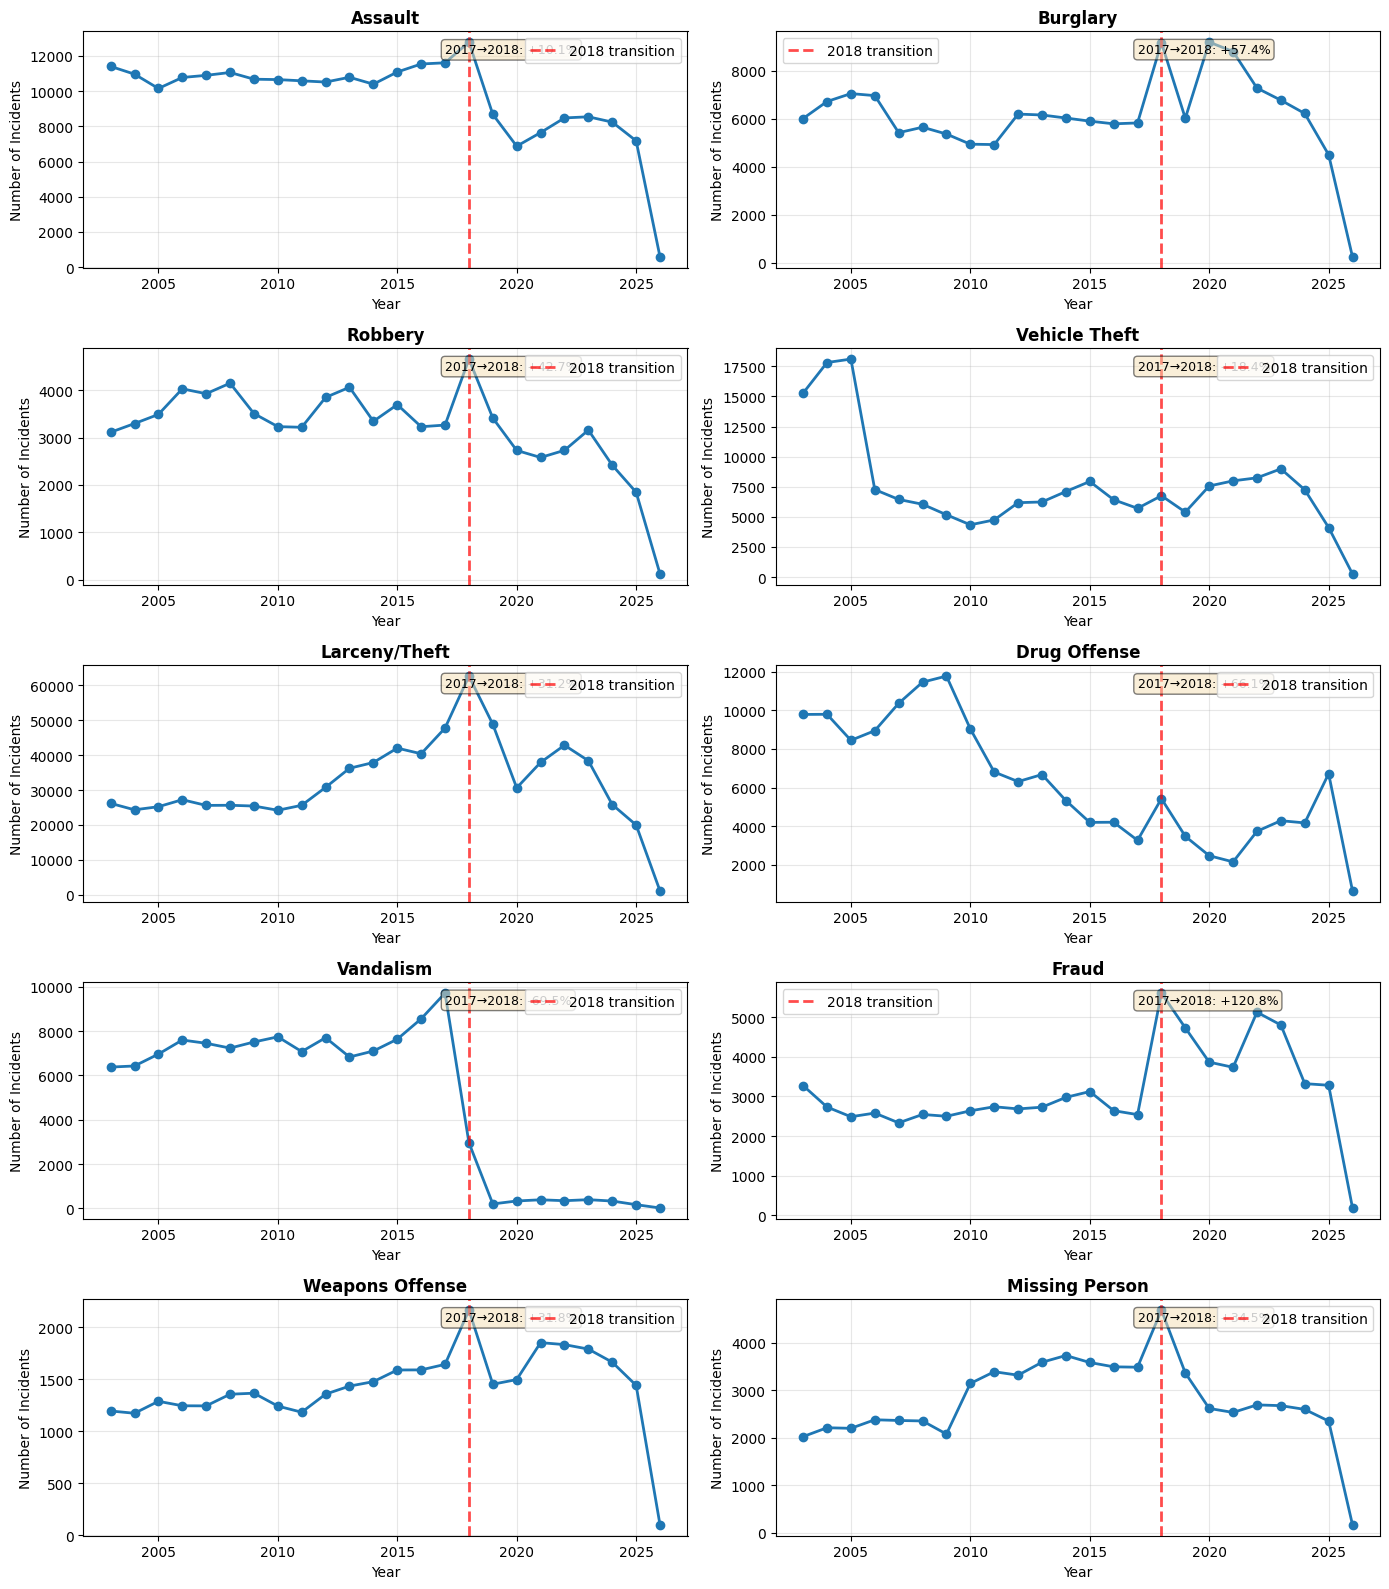


TRANSITION YEAR VALIDATION (2017 → 2018)
Assault              | 2017:  11613 | 2018:  12791 | Change:  +10.1%
Burglary             | 2017:   5828 | 2018:   9174 | Change:  +57.4%
  ⚠️  SUSPICIOUS: Large change detected!
Robbery              | 2017:   3265 | 2018:   4660 | Change:  +42.7%
  ⚠️  SUSPICIOUS: Large change detected!
Vehicle Theft        | 2017:   5705 | 2018:   6752 | Change:  +18.4%
  ⚠️  Notable change - verify mapping is correct
Larceny/Theft        | 2017:  47714 | 2018:  62577 | Change:  +31.2%
  ⚠️  SUSPICIOUS: Large change detected!
Drug Offense         | 2017:   3265 | 2018:   5423 | Change:  +66.1%
  ⚠️  SUSPICIOUS: Large change detected!
Vandalism            | 2017:   9719 | 2018:   2961 | Change:  -69.5%
  ⚠️  SUSPICIOUS: Large change detected!
Fraud                | 2017:   2542 | 2018:   5614 | Change: +120.8%
  ⚠️  SUSPICIOUS: Large change detected!
Weapons Offense      | 2017:   1644 | 2018:   2166 | Change:  +31.8%
  ⚠️  SUSPICIOUS: Large change detected!
M

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define your Personal Focus Crimes mappings
# Format: 'Unified Name': {'historical': 'HISTORICAL_CATEGORY', 'recent': ['RECENT_CATEGORY1', 'RECENT_CATEGORY2']}
focus_crimes_mapping = {
    'Assault': {'historical': 'ASSAULT', 'recent': ['ASSAULT']},
    'Burglary': {'historical': 'BURGLARY', 'recent': ['BURGLARY']},
    'Robbery': {'historical': 'ROBBERY', 'recent': ['ROBBERY']},
    'Vehicle Theft': {'historical': 'VEHICLE THEFT', 'recent': ['MOTOR VEHICLE THEFT']},
    'Larceny/Theft': {'historical': 'LARCENY/THEFT', 'recent': ['LARCENY THEFT']},
    'Drug Offense': {'historical': 'DRUG/NARCOTIC', 'recent': ['DRUG OFFENSE', 'DRUG VIOLATION']},
    'Vandalism': {'historical': 'VANDALISM', 'recent': ['VANDALISM']},
    'Fraud': {'historical': 'FRAUD', 'recent': ['FRAUD']},
    'Weapons Offense': {'historical': 'WEAPON LAWS', 'recent': ['WEAPONS OFFENSE', 'WEAPONS CARRYING ETC']},
    'Missing Person': {'historical': 'MISSING PERSON', 'recent': ['MISSING PERSON']},
}

# Create a combined yearly count for each crime
yearly_data = {}

for crime_name, mapping in focus_crimes_mapping.items():
    # Historical data
    hist_data = historical[historical['Category'] == mapping['historical']].copy()
    hist_data['Year'] = hist_data['Date'].dt.year
    hist_yearly = hist_data.groupby('Year').size()
    
    # Recent data - combine all mapped categories
    recent_data = recent[recent['Incident Category'].isin(mapping['recent'])].copy()
    recent_data['Year'] = recent_data['Incident Date'].dt.year
    recent_yearly = recent_data.groupby('Year').size()
    
    # Combine both
    combined = pd.concat([hist_yearly, recent_yearly])
    combined = combined.groupby(level=0).sum()  # Sum if overlapping years
    yearly_data[crime_name] = combined
    
    print(f"\n{crime_name}:")
    print(f"  Historical data points: {len(hist_yearly)}")
    print(f"  Recent data points: {len(recent_yearly)}")
    print(f"  Combined years: {combined.index.min()} - {combined.index.max()}")

# Create subplots for all crimes
fig, axes = plt.subplots(5, 2, figsize=(14, 16))
axes = axes.flatten()

for idx, (crime_name, yearly_counts) in enumerate(yearly_data.items()):
    ax = axes[idx]
    ax.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, markersize=6)
    ax.axvline(x=2018, color='red', linestyle='--', linewidth=2, alpha=0.7, label='2018 transition')
    ax.set_title(f'{crime_name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Incidents')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Check for suspicious jumps at 2018
    if 2017 in yearly_counts.index and 2018 in yearly_counts.index:
        change_pct = ((yearly_counts[2018] - yearly_counts[2017]) / yearly_counts[2017] * 100)
        ax.text(2017, yearly_counts.max() * 0.95, f'2017→2018: {change_pct:+.1f}%', 
                fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('crime_trends_validation.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("TRANSITION YEAR VALIDATION (2017 → 2018)")
print("="*60)
for crime_name, yearly_counts in yearly_data.items():
    if 2017 in yearly_counts.index and 2018 in yearly_counts.index:
        count_2017 = yearly_counts[2017]
        count_2018 = yearly_counts[2018]
        change = count_2018 - count_2017
        change_pct = (change / count_2017 * 100) if count_2017 > 0 else 0
        print(f"{crime_name:20} | 2017: {count_2017:6.0f} | 2018: {count_2018:6.0f} | Change: {change_pct:+6.1f}%")
        
        # Flag suspicious changes
        if abs(change_pct) > 30:
            print(f"  ⚠️  SUSPICIOUS: Large change detected!")
        elif abs(change_pct) > 15:
            print(f"  ⚠️  Notable change - verify mapping is correct")

print("\n" + "="*60)
print("OBSERVATIONS TO DOCUMENT:")
print("="*60)
print("1. Are transitions smooth or are there sharp jumps?")
print("2. Do increases/decreases match expected crime trends?")
print("3. Are there any crimes where the mapping might be wrong?")
print("4. Does 2018 show consistent data quality between datasets?")


## Step 2.7: Think back on your work in this long and epic run of exercises.

> **Exercise 2.4**: Reflect on your work
>
> * What assumptions did you have to make during this merge?
> * Which of your Personal Focus Crimes are you most/least confident about? Why?
> * If someone used your merged dataset without reading your documentation, what mistakes might they make?
> * How does this experience connect to the "dirty data" concept from the Richardson *et al.* reading in Week 1?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> The reflection should be your own thinking. This is where you practice the critical data science reasoning that separates good analysts from people who just run code.
</div>

### My Reflection on the Data Merge

#### 1. Assumptions I Made During This Merge

**Key assumptions:**
- I assumed that matching categories by name (even with formatting differences) represents the same underlying crime
- I assumed that combining DRUG OFFENSE + DRUG VIOLATION into a single "Drug Offense" category accurately represents historical DRUG/NARCOTIC crimes
- I assumed that combining WEAPONS OFFENSE + WEAPONS CARRYING ETC captures the same enforcement practices as historical WEAPON LAWS
- I assumed the 2018 transition point is clean (even though there's a May 2018 overlap)
- I assumed that missing values (NaN) in coordinates or categories represent random missingness, not systematic bias

**Consequences of these assumptions:**
- If the category names changed because the underlying definition changed, my results will be misleading
- If DRUG OFFENSE and DRUG VIOLATION represent different types of drug crimes, combining them loses that distinction
- If the police department changed how they classify crimes in 2018, the trends may reflect reclassification rather than actual changes in crime

#### 2. Personal Focus Crimes: Confidence Levels

**Most Confident About (High Confidence):**
- **Assault, Robbery, Burglary, Vandalism**: Exact matches across datasets - these are unlikely to change definition
- **Larceny/Theft**: Simple formatting change (slash to space), same crime concept
- **Fraud, Missing Person**: Both exact matches - less ambiguity

**Least Confident About (Medium Confidence):**
- **Drug Offense**: Combining two categories (DRUG OFFENSE + DRUG VIOLATION) - they might represent different things
- **Weapons Offense**: Combining multiple categories - enforcement practices may differ
- **Vehicle Theft**: Name changed from VEHICLE THEFT to MOTOR VEHICLE THEFT - could mean scope changed (does it now include bikes? Exclude certain vehicles?)

**Why the confidence differences:**
- Exact matches are safer because they show the dataset creators intended them to be comparable
- Combined categories require judgment - what if they split for a reason?
- Renamed categories worry me because the name change might indicate a scope change

#### 3. Potential Mistakes Someone Could Make With This Dataset

**Without reading documentation, users might:**
1. **Assume all categories are directly comparable**: Someone might not realize DRUG OFFENSE and DRUG VIOLATION were combined
2. **Miss the 2018 transition**: Not realizing there's a schema change, they might interpret 2017→2018 changes as real crime trends when they could be artifacts of reclassification
3. **Count incidents wrong**: If they don't know that some categories span multiple source categories, they might recount and get different numbers
4. **Make wrong policy conclusions**: If they see a spike in "Weapons Offense" in 2018, they might conclude policing got worse when it could be a classification change
5. **Misunderstand coordinate systems**: Historical X/Y vs Recent Latitude/Longitude could cause spatial analysis errors

**Why documentation is critical**: This dataset looks clean at first glance, but it's actually the result of many judgment calls. Without documenting those calls, future users will make incorrect assumptions.

#### 4. Connection to "Dirty Data" and Predictive Policing

**How this connects to Richardson et al.:**

The Richardson et al. paper argued that "dirty data" - incomplete, biased, or inconsistent data - undermines predictive policing because you can't trust the patterns you find. This merge exercise shows why:

- **Category changes hide real patterns**: If DRUNKENNESS disappeared from the 2018 dataset, does that mean public intoxication stopped? Or was it decriminalized? Or reclassified? A predictive model trained on this data would give completely wrong answers
- **Schema changes create false trends**: If the police department reorganized how they classify crimes in 2018, any temporal patterns around that year are suspect. A predictive model might learn to "predict" classification systems rather than actual crime
- **Missing data has politics**: Why did some categories disappear? Was it policy change, resource constraints, or political decision? A predictive policing system trained on this data might perpetuate whatever political decisions led to these changes

**The "dirty data" lesson**: This dataset isn't "dirty" because of missing values or typos - it's dirty because the schema itself changed, and we have to make judgment calls to merge it. Predictive policing systems make the same kind of judgment calls implicitly, without documenting them. That's dangerous.

**My takeaway**: Every dataset embeds decisions about what to count, how to count it, and whose activities get recorded. This merge exercise forced me to make those decisions explicit. That's exactly what Richardson et al. argues needs to happen in predictive policing - the decisions need to be visible, documented, and contestable.


**Uncle Sune Rants**: This run of exercises and mini exercises in part 2 migth feel frustrating and difficult. If yes, that's awesome! That's the point. You're getting stronger, smarter, and ready for the real world.

In the real world, you almost never get perfectly clean, perfectly formatted data handed to you on a silver platter. The ability to wrangle messy, inconsistent data into a usable form is one of the most valuable skills in data science. 

## Part 3: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploit the human eye and make complex patterns easier to identify. 

Let's use our new mega dataset to look for interesting patterns in the big crime-data. Only consider your Personal Focus Crimes (see Exercise 2.2 above). We'll be generating lots of plots, remember to add good axes, use subplots, pack the plots closely, etc.

* **Hint**: You may use this exercise as an extra validation of the personal focus crimes, and I won't be mad if you go back to Exercise 2.2/2.3 and update your list after having done this exercise.

> **Exercise 3.1**: More temporal patterns
>
> Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> * *Yearly trends*. Redo the plots from last week with the new dataset. Do you see anything that surprises you?
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday (Monday, Tuesday, ...). 
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midnight to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.
>    * What does this plot tell you about the limitations of your "24 hour cycle" plot from above.
>    * For some of the crime-types with lots of data, try taking your binning to the 5-minute level. What does that show you? 

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> It's OK to ask your LLM for help with creating these plots, <b>but try on your own first</b>. Use the LLM as a kind of TA to help you get your code to work. Don't just ask for answers and pre-written code. By actually doing the counting and slicing yourself, you'll start to get a feel for how to work with temporal data in pandas. That's a key part of becoming a data whisperer.
</div>

In [30]:
# First, let's create a merged dataset of our Personal Focus Crimes
# Standardize column names and create a unified dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create merged dataset with standardized columns
def create_merged_dataset():
    """Merge historical and recent data with unified schema"""
    
    # Focus crimes mapping (from Exercise 2.2)
    focus_crimes_mapping = {
        'Assault': {'historical': 'ASSAULT', 'recent': ['ASSAULT']},
        'Burglary': {'historical': 'BURGLARY', 'recent': ['BURGLARY']},
        'Robbery': {'historical': 'ROBBERY', 'recent': ['ROBBERY']},
        'Vehicle Theft': {'historical': 'VEHICLE THEFT', 'recent': ['MOTOR VEHICLE THEFT']},
        'Larceny/Theft': {'historical': 'LARCENY/THEFT', 'recent': ['LARCENY THEFT']},
        'Drug Offense': {'historical': 'DRUG/NARCOTIC', 'recent': ['DRUG OFFENSE', 'DRUG VIOLATION']},
        'Vandalism': {'historical': 'VANDALISM', 'recent': ['VANDALISM']},
        'Fraud': {'historical': 'FRAUD', 'recent': ['FRAUD']},
        'Weapons Offense': {'historical': 'WEAPON LAWS', 'recent': ['WEAPONS OFFENSE', 'WEAPONS CARRYING ETC']},
        'Missing Person': {'historical': 'MISSING PERSON', 'recent': ['MISSING PERSON']},
    }
    
    # Process historical data - select only essential columns and standardize names upfront
    hist_cols_to_keep = ['Category', 'Date', 'Time', 'PdDistrict', 'Y', 'X']
    historical_subset = historical[hist_cols_to_keep].copy()
    
    # Rename to standardized names
    historical_subset = historical_subset.rename(columns={
        'Date': 'Incident_Date',
        'Time': 'Incident_Time',
        'PdDistrict': 'Police_District',
        'Y': 'Latitude',
        'X': 'Longitude'
    })
    
    # Add crime type mapping
    historical_subset['Crime_Type'] = historical_subset['Category'].map(
        {v['historical']: k for k, v in focus_crimes_mapping.items()}
    )
    
    # Filter to only our focus crimes
    hist_merged = historical_subset[historical_subset['Crime_Type'].notna()].copy()
    
    # Process recent data - select only essential columns
    recent_cols_to_keep = ['Incident Category', 'Incident Date', 'Incident Time', 'Police District', 'Latitude', 'Longitude']
    recent_subset = recent[recent_cols_to_keep].copy()
    
    # Rename to standardized names
    recent_subset = recent_subset.rename(columns={
        'Incident Date': 'Incident_Date',
        'Incident Time': 'Incident_Time',
        'Police District': 'Police_District',
        'Incident Category': 'Incident_Category'
    })
    
    # Map crime types - create mapping from category to crime name
    crime_type_map = {}
    for crime_name, mapping in focus_crimes_mapping.items():
        for cat in mapping['recent']:
            crime_type_map[cat] = crime_name
    
    recent_subset['Crime_Type'] = recent_subset['Incident_Category'].map(crime_type_map)
    recent_merged = recent_subset[recent_subset['Crime_Type'].notna()].copy()
    
    # Select only common columns for both
    common_cols = ['Incident_Date', 'Incident_Time', 'Police_District', 'Crime_Type', 'Latitude', 'Longitude']
    
    hist_final = hist_merged[common_cols].copy()
    recent_final = recent_merged[common_cols].copy()
    
    # Combine datasets
    combined = pd.concat([hist_final, recent_final], ignore_index=True)
    
    # Parse dates
    combined['Incident_Date'] = pd.to_datetime(combined['Incident_Date'])
    
    # Parse times as datetime strings to preserve hour information
    # Keep as time string format for now, we'll extract hour in temporal features
    combined['Incident_Time'] = combined['Incident_Time'].astype(str)
    
    return combined

# Create the merged dataset
print("Creating merged dataset...")
merged_data = create_merged_dataset()

print(f"✓ Merged dataset shape: {merged_data.shape}")
print(f"✓ Date range: {merged_data['Incident_Date'].min()} to {merged_data['Incident_Date'].max()}")
print(f"✓ Crime types included: {sorted(merged_data['Crime_Type'].unique())}")
print(f"✓ Records per crime type:")
for crime in sorted(merged_data['Crime_Type'].unique()):
    count = (merged_data['Crime_Type'] == crime).sum()
    print(f"  - {crime}: {count:,}")

Creating merged dataset...
✓ Merged dataset shape: (1852890, 6)
✓ Date range: 2003-01-01 00:00:00 to 2026-02-01 00:00:00
✓ Crime types included: ['Assault', 'Burglary', 'Drug Offense', 'Fraud', 'Larceny/Theft', 'Missing Person', 'Robbery', 'Vandalism', 'Vehicle Theft', 'Weapons Offense']
✓ Records per crime type:
  - Assault: 232,167
  - Burglary: 147,190
  - Drug Offense: 149,405
  - Fraud: 75,222
  - Larceny/Theft: 772,367
  - Missing Person: 66,952
  - Robbery: 77,068
  - Vandalism: 117,039
  - Vehicle Theft: 181,281
  - Weapons Offense: 34,199


In [31]:
# Extract temporal features for analysis
merged_data['Year'] = merged_data['Incident_Date'].dt.year
merged_data['Month'] = merged_data['Incident_Date'].dt.month
merged_data['Month_Name'] = merged_data['Incident_Date'].dt.strftime('%B')
merged_data['DayOfWeek'] = merged_data['Incident_Date'].dt.day_name()

# Extract hour from time string (format: HH:MM:SS)
def extract_hour(time_str):
    if pd.isna(time_str) or time_str == 'NaT' or time_str == 'nan':
        return None
    try:
        return int(str(time_str).split(':')[0])
    except:
        return None

merged_data['Hour'] = merged_data['Incident_Time'].apply(extract_hour)

# Map days to numeric for ordering
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_data['DayOfWeek'] = pd.Categorical(merged_data['DayOfWeek'], categories=day_order, ordered=True)

# Check data quality
print("Temporal features extracted successfully")
print(f"Year range: {merged_data['Year'].min()} - {merged_data['Year'].max()}")
valid_hours = merged_data['Hour'].dropna()
if len(valid_hours) > 0:
    print(f"Hours with data: {int(valid_hours.min())} - {int(valid_hours.max())}")
else:
    print(f"Hours with data: None")
print(f"Records with valid time: {(~merged_data['Hour'].isna()).sum():,} / {len(merged_data):,}")


Temporal features extracted successfully
Year range: 2003 - 2026
Hours with data: 0 - 23
Records with valid time: 1,852,890 / 1,852,890


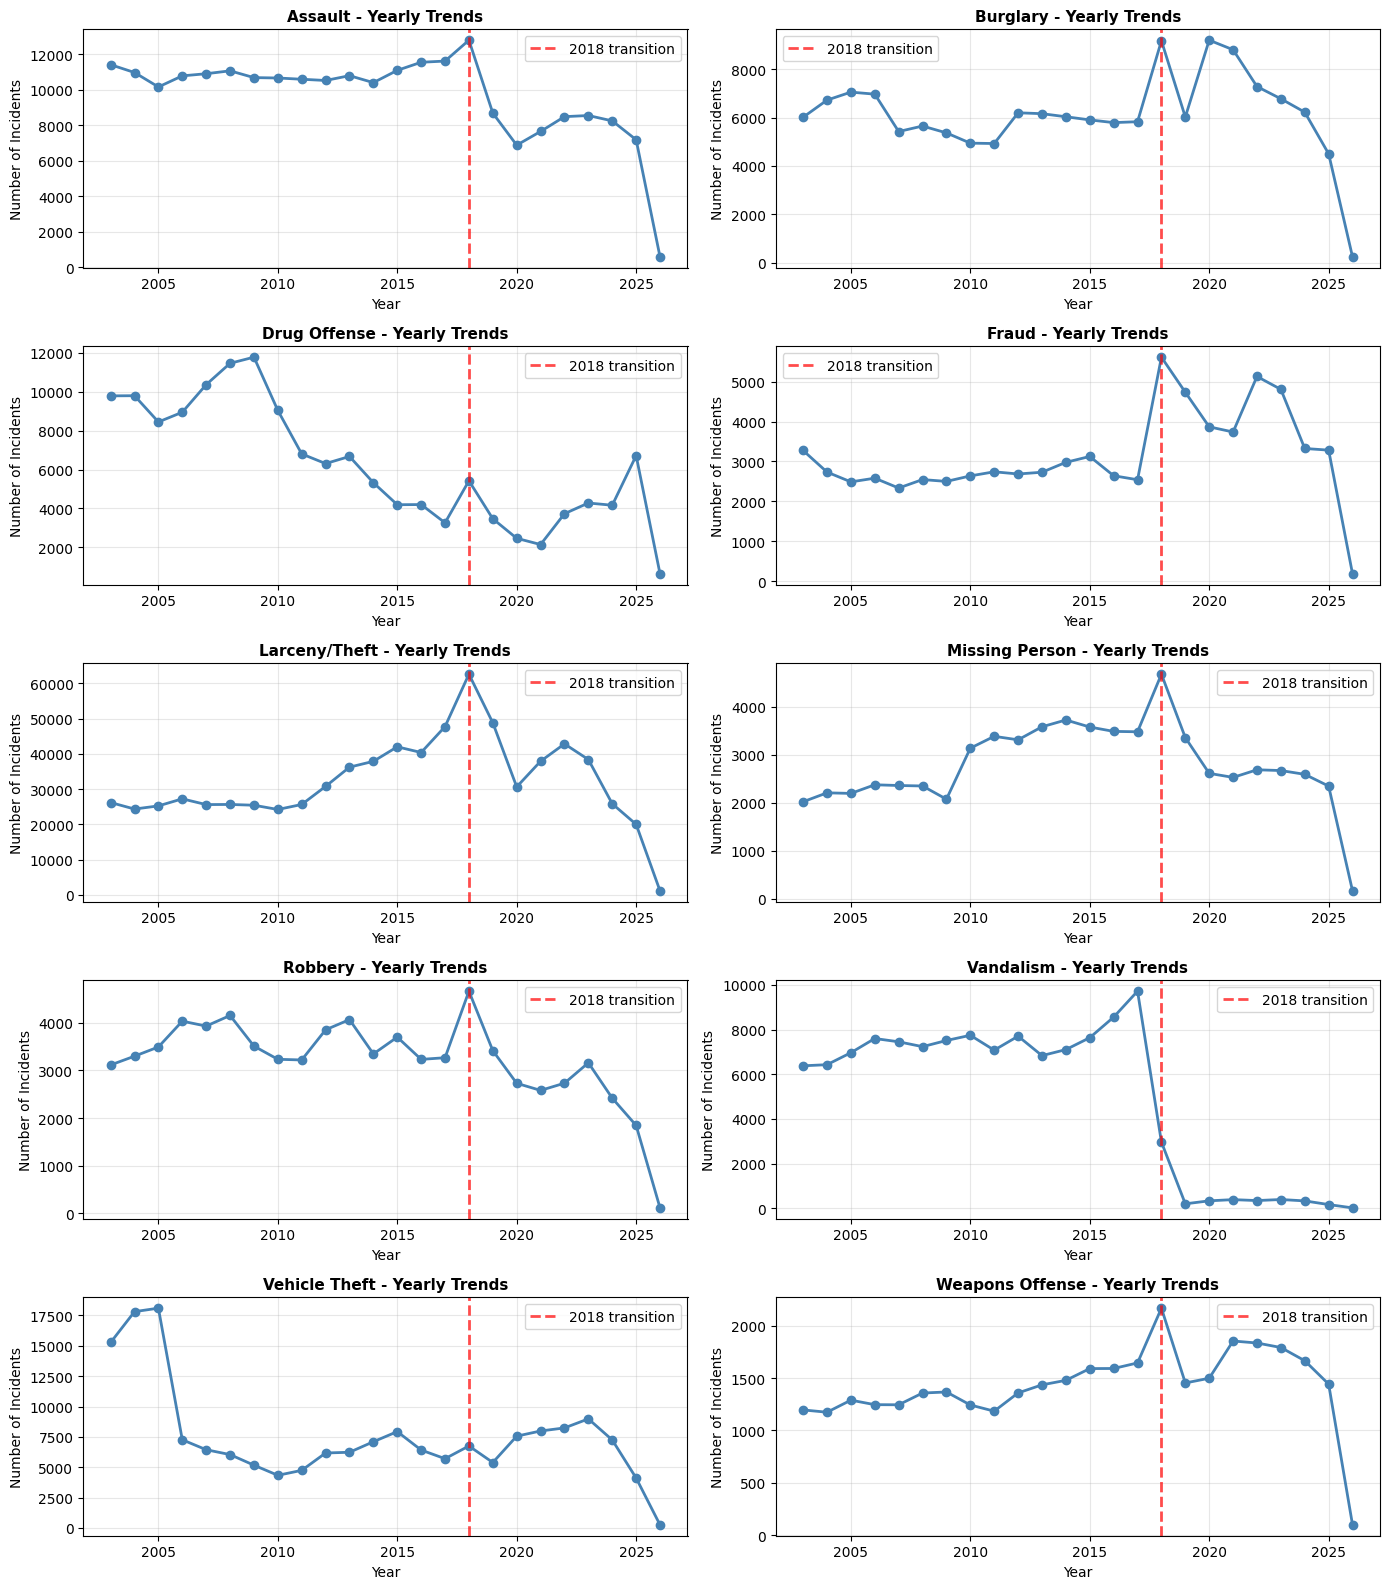

YEARLY TRENDS - Key observations:
Assault              | Total: 232,167 | Pre-2018 avg:  10,877/yr | Post-2018 avg:   7,668/yr
Burglary             | Total: 147,190 | Pre-2018 avg:   5,931/yr | Post-2018 avg:   6,469/yr
Drug Offense         | Total: 149,405 | Pre-2018 avg:   7,757/yr | Post-2018 avg:   3,673/yr
Fraud                | Total:  75,222 | Pre-2018 avg:   2,703/yr | Post-2018 avg:   3,854/yr
Larceny/Theft        | Total: 772,367 | Pre-2018 avg:  30,958/yr | Post-2018 avg:  34,222/yr
Missing Person       | Total:  66,952 | Pre-2018 avg:   2,886/yr | Post-2018 avg:   2,628/yr
Robbery              | Total:  77,068 | Pre-2018 avg:   3,561/yr | Post-2018 avg:   2,628/yr
Vandalism            | Total: 117,039 | Pre-2018 avg:   7,462/yr | Post-2018 avg:     567/yr
Vehicle Theft        | Total: 181,281 | Pre-2018 avg:   8,317/yr | Post-2018 avg:   6,280/yr
Weapons Offense      | Total:  34,199 | Pre-2018 avg:   1,360/yr | Post-2018 avg:   1,534/yr


In [32]:
# YEARLY TRENDS
# Redo the plots from Exercise 2.3 with the full merged dataset

yearly_counts = merged_data.groupby(['Year', 'Crime_Type']).size().reset_index(name='Count')

fig, axes = plt.subplots(5, 2, figsize=(14, 16))
axes = axes.flatten()

crime_types = sorted(merged_data['Crime_Type'].unique())

for idx, crime_type in enumerate(crime_types):
    ax = axes[idx]
    crime_data = yearly_counts[yearly_counts['Crime_Type'] == crime_type]
    
    ax.plot(crime_data['Year'], crime_data['Count'], marker='o', linewidth=2, markersize=6, color='steelblue')
    ax.axvline(x=2018, color='red', linestyle='--', linewidth=2, alpha=0.7, label='2018 transition')
    ax.set_title(f'{crime_type} - Yearly Trends', fontsize=11, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Incidents')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.savefig('temporal_1_yearly_trends.png', dpi=150, bbox_inches='tight')
plt.show()

print("YEARLY TRENDS - Key observations:")
print("=" * 70)
for crime_type in crime_types:
    crime_data = yearly_counts[yearly_counts['Crime_Type'] == crime_type]
    total = crime_data['Count'].sum()
    recent_avg = crime_data[crime_data['Year'] >= 2018]['Count'].mean()
    historical_avg = crime_data[crime_data['Year'] < 2018]['Count'].mean()
    print(f"{crime_type:20} | Total: {total:7,.0f} | Pre-2018 avg: {historical_avg:7,.0f}/yr | Post-2018 avg: {recent_avg:7,.0f}/yr")


/var/folders/qq/435fz8ld4wl_673l4fsgv9xw0000gn/T/ipykernel_49600/4066370196.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_counts = merged_data.groupby(['DayOfWeek', 'Crime_Type']).size().reset_index(name='Count')


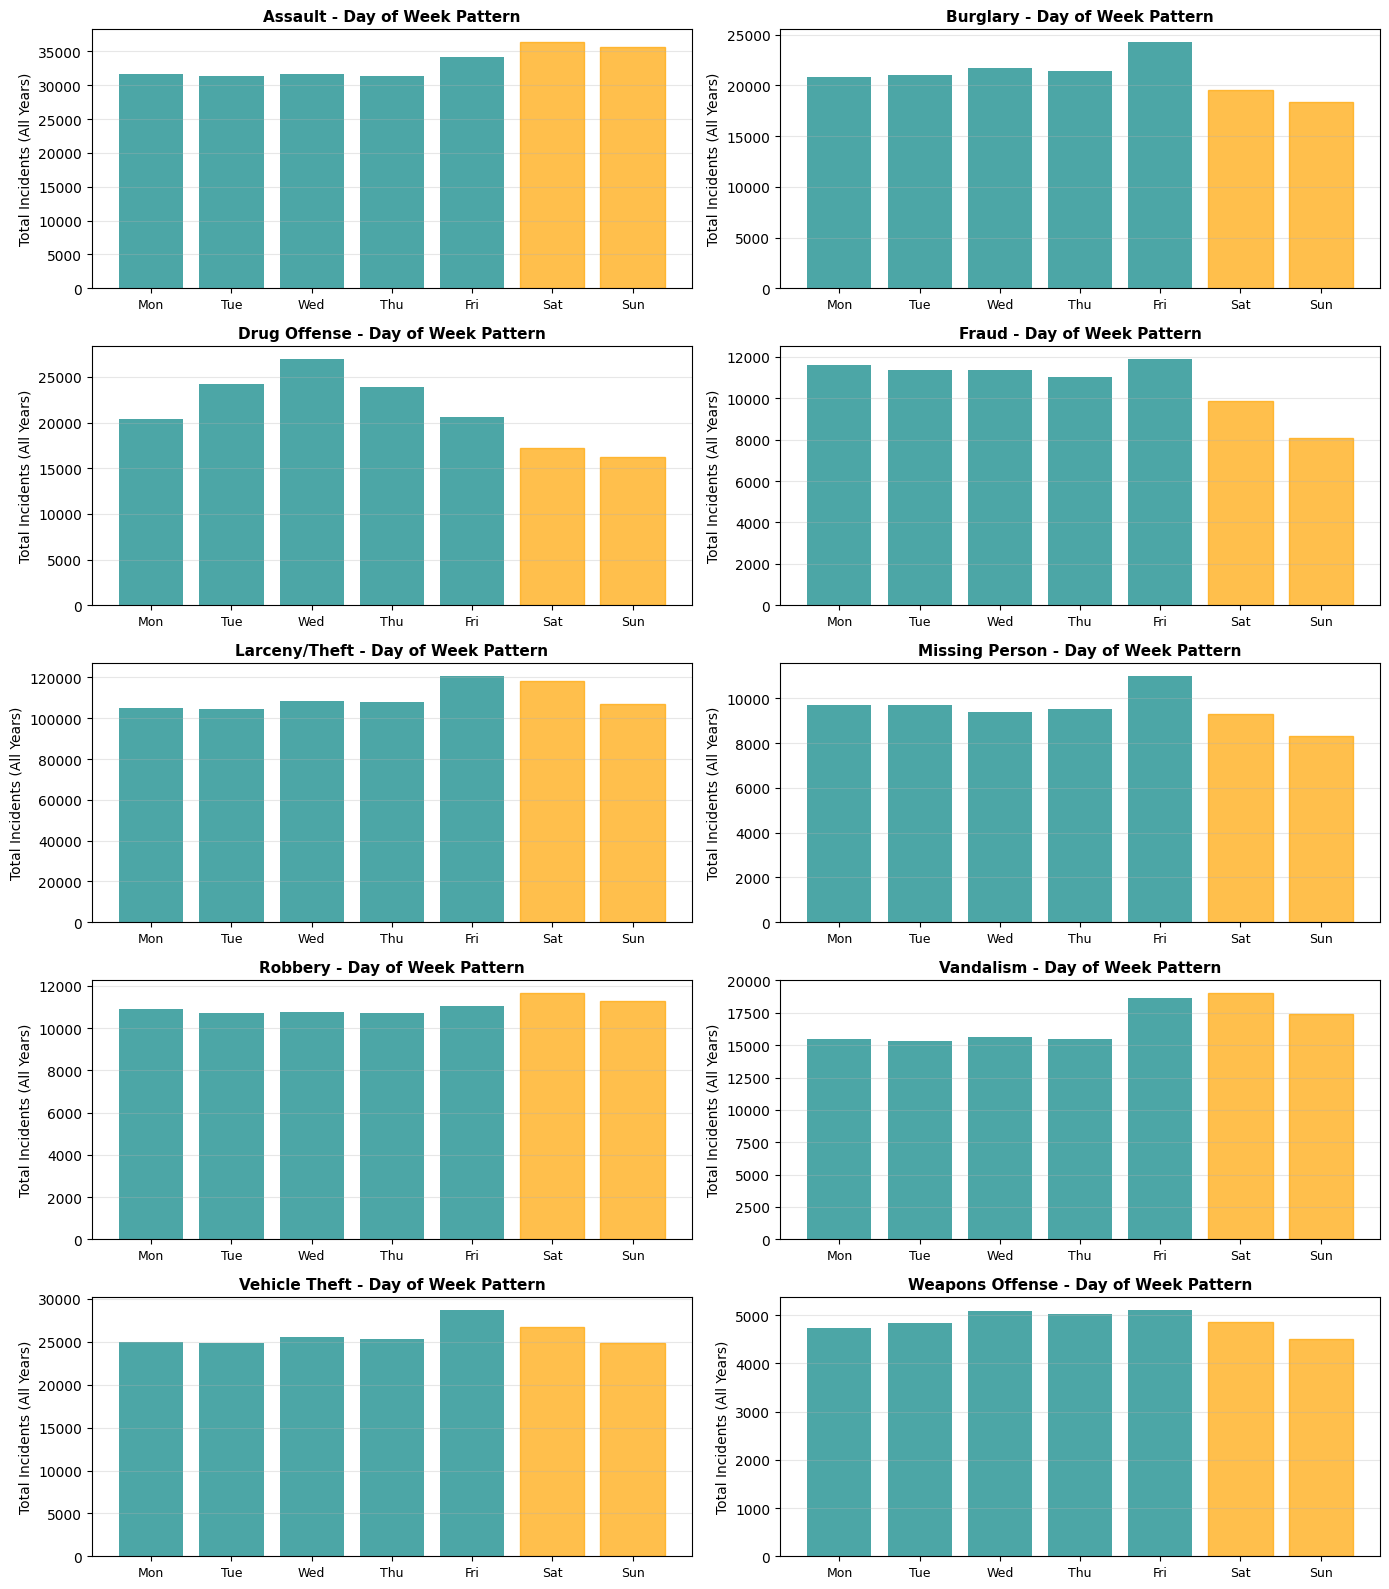


WEEKLY PATTERNS - Key observations:
Assault              | Peak: Saturday   | Low: Thursday  
Burglary             | Peak: Friday     | Low: Sunday    
Drug Offense         | Peak: Wednesday  | Low: Sunday    
Fraud                | Peak: Friday     | Low: Sunday    
Larceny/Theft        | Peak: Friday     | Low: Tuesday   
Missing Person       | Peak: Friday     | Low: Sunday    
Robbery              | Peak: Saturday   | Low: Tuesday   
Vandalism            | Peak: Saturday   | Low: Tuesday   
Vehicle Theft        | Peak: Friday     | Low: Sunday    
Weapons Offense      | Peak: Friday     | Low: Sunday    


In [33]:
# WEEKLY PATTERNS
# Count crimes by day of week, ignoring year variation

weekly_counts = merged_data.groupby(['DayOfWeek', 'Crime_Type']).size().reset_index(name='Count')

fig, axes = plt.subplots(5, 2, figsize=(14, 16))
axes = axes.flatten()

for idx, crime_type in enumerate(crime_types):
    ax = axes[idx]
    crime_data = weekly_counts[weekly_counts['Crime_Type'] == crime_type]
    
    # Ensure proper day ordering
    crime_data = crime_data.sort_values('DayOfWeek')
    
    bars = ax.bar(range(len(crime_data)), crime_data['Count'], color='teal', alpha=0.7)
    ax.set_xticks(range(len(crime_data)))
    ax.set_xticklabels([d[:3] for d in crime_data['DayOfWeek']], fontsize=9)
    ax.set_title(f'{crime_type} - Day of Week Pattern', fontsize=11, fontweight='bold')
    ax.set_ylabel('Total Incidents (All Years)')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Highlight weekends
    for i, day in enumerate(crime_data['DayOfWeek']):
        if day in ['Saturday', 'Sunday']:
            bars[i].set_color('orange')
            bars[i].set_alpha(0.7)

plt.tight_layout()
plt.savefig('temporal_2_weekly_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nWEEKLY PATTERNS - Key observations:")
print("=" * 70)
for crime_type in crime_types:
    crime_data = weekly_counts[weekly_counts['Crime_Type'] == crime_type]
    crime_data_sorted = crime_data.sort_values('DayOfWeek')
    max_day = crime_data_sorted.loc[crime_data_sorted['Count'].idxmax(), 'DayOfWeek']
    min_day = crime_data_sorted.loc[crime_data_sorted['Count'].idxmin(), 'DayOfWeek']
    print(f"{crime_type:20} | Peak: {max_day:10} | Low: {min_day:10}")


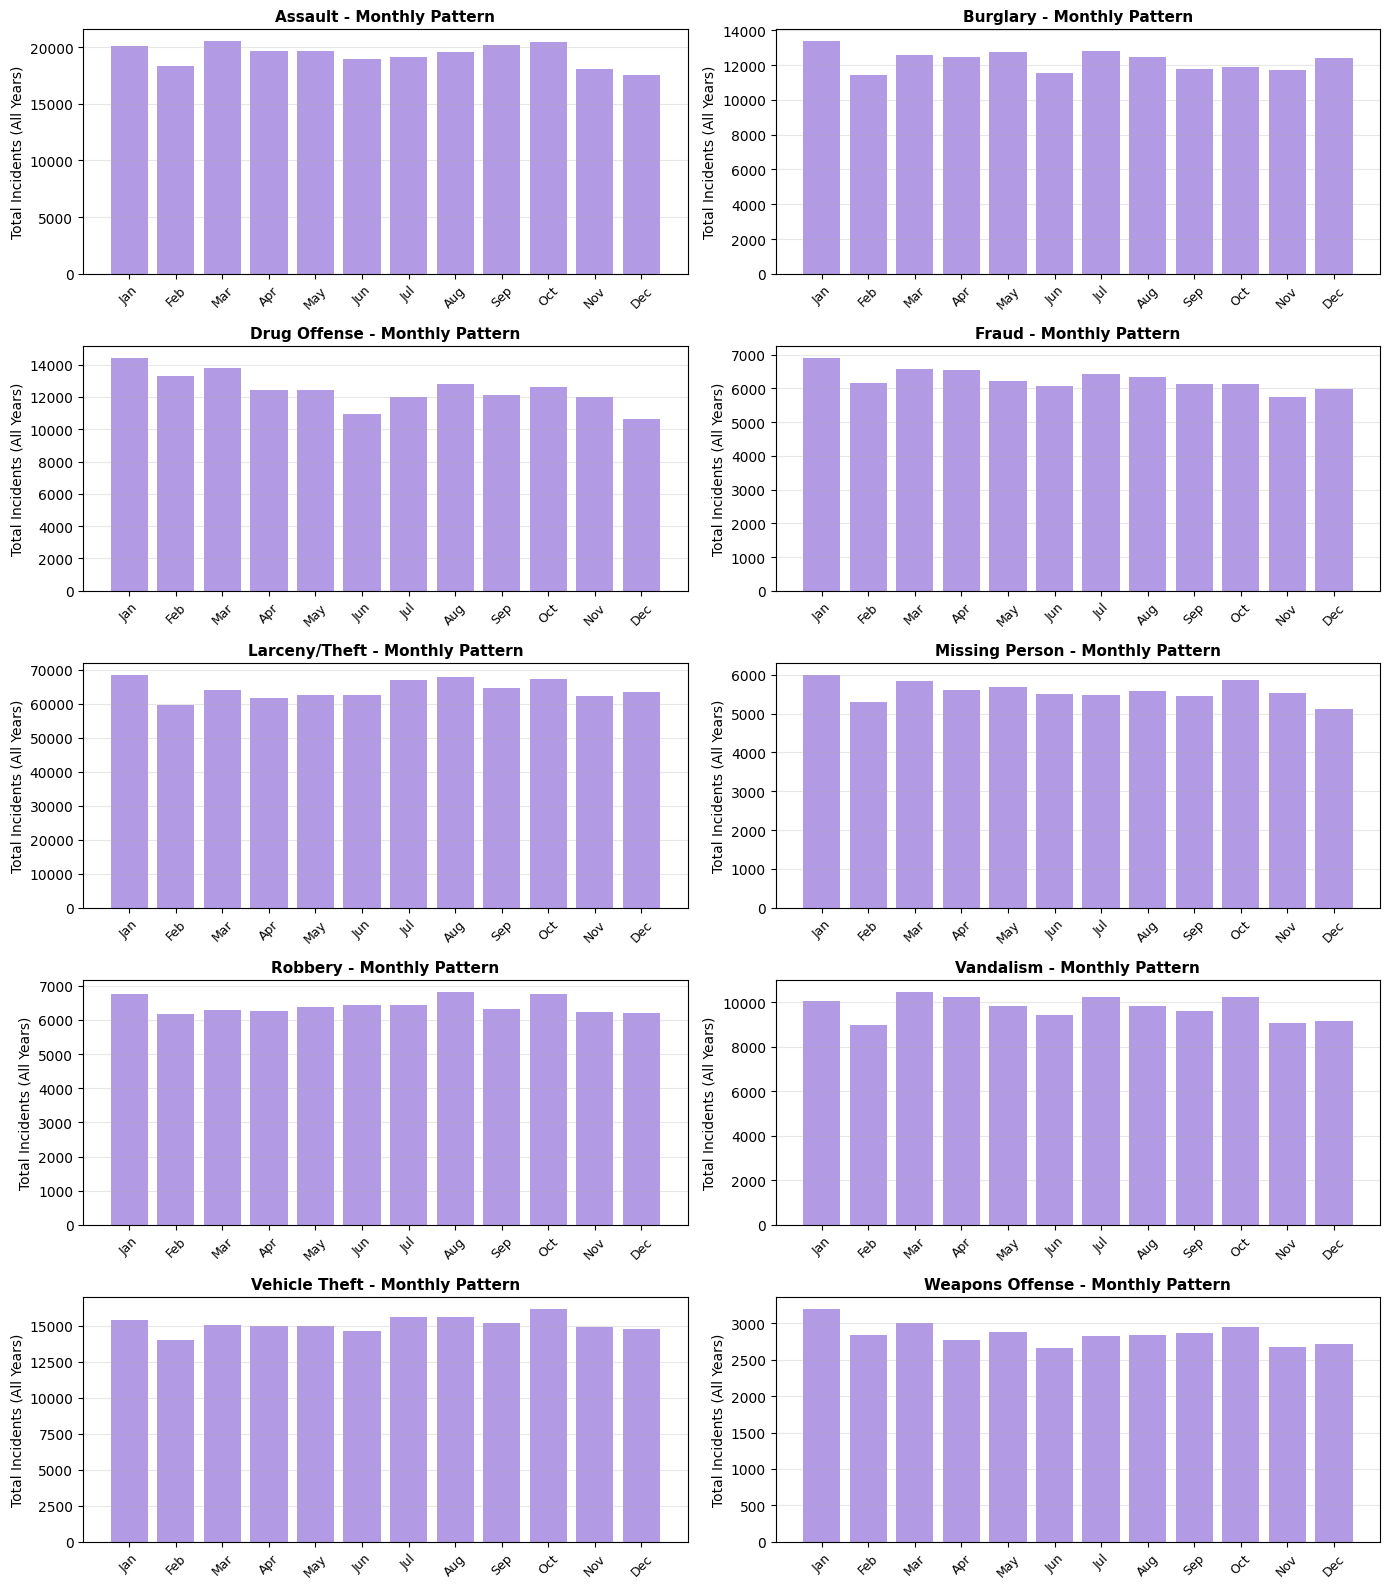


MONTHLY PATTERNS - Key observations:
Assault              | Peak: March      | Low: December  
Burglary             | Peak: January    | Low: February  
Drug Offense         | Peak: January    | Low: December  
Fraud                | Peak: January    | Low: November  
Larceny/Theft        | Peak: January    | Low: February  
Missing Person       | Peak: January    | Low: December  
Robbery              | Peak: August     | Low: February  
Vandalism            | Peak: March      | Low: February  
Vehicle Theft        | Peak: October    | Low: February  
Weapons Offense      | Peak: January    | Low: June      


In [34]:
# MONTHLY PATTERNS
# Count crimes by month, ignoring year variation

monthly_counts = merged_data.groupby(['Month', 'Month_Name', 'Crime_Type']).size().reset_index(name='Count')

fig, axes = plt.subplots(5, 2, figsize=(14, 16))
axes = axes.flatten()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

for idx, crime_type in enumerate(crime_types):
    ax = axes[idx]
    crime_data = monthly_counts[monthly_counts['Crime_Type'] == crime_type]
    crime_data = crime_data.sort_values('Month')
    
    bars = ax.bar(range(len(crime_data)), crime_data['Count'], color='mediumpurple', alpha=0.7)
    ax.set_xticks(range(len(crime_data)))
    ax.set_xticklabels([m[:3] for m in crime_data['Month_Name']], fontsize=9, rotation=45)
    ax.set_title(f'{crime_type} - Monthly Pattern', fontsize=11, fontweight='bold')
    ax.set_ylabel('Total Incidents (All Years)')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_3_monthly_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nMONTHLY PATTERNS - Key observations:")
print("=" * 70)
for crime_type in crime_types:
    crime_data = monthly_counts[monthly_counts['Crime_Type'] == crime_type]
    crime_data_sorted = crime_data.sort_values('Count', ascending=False)
    max_month = crime_data_sorted.iloc[0]['Month_Name']
    min_month = crime_data_sorted.iloc[-1]['Month_Name']
    print(f"{crime_type:20} | Peak: {max_month:10} | Low: {min_month:10}")


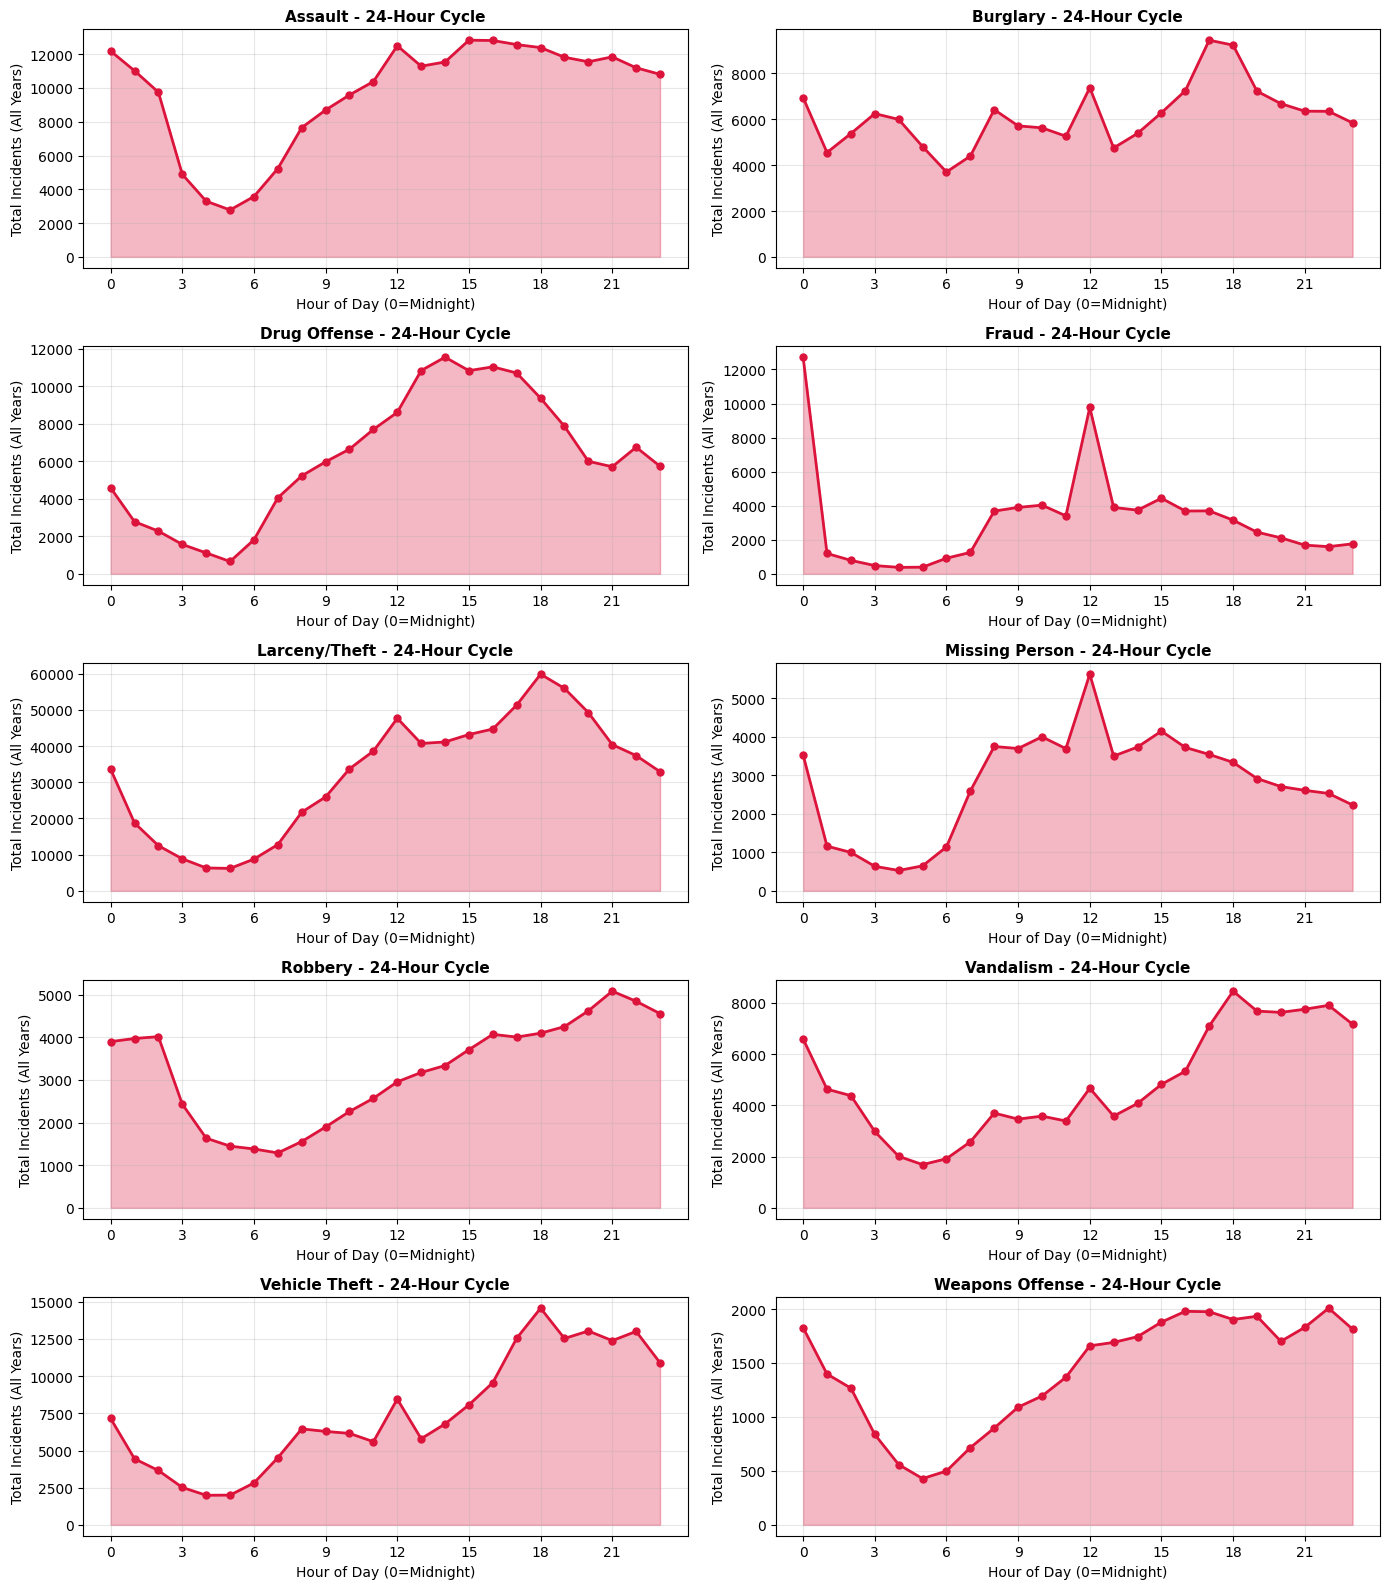


24-HOUR CYCLE - Key observations:
Assault              | Peak: 15:00 | Low: 05:00
    -> Day (6am-6pm): 56.4% | Night (6pm-6am): 43.6%
Burglary             | Peak: 17:00 | Low: 06:00
    -> Day (6am-6pm): 54.9% | Night (6pm-6am): 45.1%
Drug Offense         | Peak: 14:00 | Low: 05:00
    -> Day (6am-6pm): 69.8% | Night (6pm-6am): 30.2%
Fraud                | Peak: 00:00 | Low: 04:00
    -> Day (6am-6pm): 66.0% | Night (6pm-6am): 34.0%
Larceny/Theft        | Peak: 18:00 | Low: 05:00
    -> Day (6am-6pm): 60.9% | Night (6pm-6am): 39.1%
Missing Person       | Peak: 12:00 | Low: 04:00
    -> Day (6am-6pm): 69.4% | Night (6pm-6am): 30.6%
Robbery              | Peak: 21:00 | Low: 07:00
    -> Day (6am-6pm): 47.1% | Night (6pm-6am): 52.9%
Vandalism            | Peak: 18:00 | Low: 05:00
    -> Day (6am-6pm): 48.4% | Night (6pm-6am): 51.6%
Vehicle Theft        | Peak: 18:00 | Low: 04:00
    -> Day (6am-6pm): 53.9% | Night (6pm-6am): 46.1%
Weapons Offense      | Peak: 22:00 | Low: 05:00
    -> D

In [35]:
# 24-HOUR CYCLE PATTERN
# Count crimes by hour of day, ignoring everything else

hourly_counts = merged_data.groupby(['Hour', 'Crime_Type']).size().reset_index(name='Count')

fig, axes = plt.subplots(5, 2, figsize=(14, 16))
axes = axes.flatten()

for idx, crime_type in enumerate(crime_types):
    ax = axes[idx]
    crime_data = hourly_counts[hourly_counts['Crime_Type'] == crime_type]
    crime_data = crime_data.sort_values('Hour')
    
    # Ensure all hours 0-23 are present for proper plotting
    all_hours = pd.DataFrame({'Hour': range(24)})
    crime_data = all_hours.merge(crime_data, on='Hour', how='left').fillna(0)
    crime_data['Crime_Type'] = crime_type
    
    ax.plot(crime_data['Hour'], crime_data['Count'], marker='o', linewidth=2, markersize=5, color='crimson')
    ax.fill_between(crime_data['Hour'].values, crime_data['Count'].values, alpha=0.3, color='crimson')
    ax.set_title(f'{crime_type} - 24-Hour Cycle', fontsize=11, fontweight='bold')
    ax.set_xlabel('Hour of Day (0=Midnight)')
    ax.set_ylabel('Total Incidents (All Years)')
    ax.set_xticks(range(0, 24, 3))
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('temporal_4_hourly_24h.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n24-HOUR CYCLE - Key observations:")
print("=" * 70)
for crime_type in crime_types:
    crime_data = hourly_counts[hourly_counts['Crime_Type'] == crime_type]
    if len(crime_data) == 0:
        print(f"{crime_type:20} | No data available")
        continue
    
    crime_data_sorted = crime_data.sort_values('Count', ascending=False)
    peak_hour = int(crime_data_sorted.iloc[0]['Hour'])
    
    # Safely get minimum hour
    min_idx = crime_data_sorted['Count'].idxmin() if len(crime_data_sorted) > 0 else 0
    low_hour = int(crime_data_sorted.loc[min_idx, 'Hour'])
    
    print(f"{crime_type:20} | Peak: {peak_hour:02d}:00 | Low: {low_hour:02d}:00")
    
    # Additional insight
    daytime = crime_data[crime_data['Hour'].between(6, 18)]['Count'].sum()
    nighttime = crime_data[crime_data['Hour'].isin(range(19, 24)) | crime_data['Hour'].isin(range(0, 6))]['Count'].sum()
    day_pct = (daytime / (daytime + nighttime) * 100) if (daytime + nighttime) > 0 else 0
    print(f"    -> Day (6am-6pm): {day_pct:.1f}% | Night (6pm-6am): {100-day_pct:.1f}%")

In [ ]:
# 168-HOUR WEEK PATTERN (Hour x Day of Week)
# This reveals how hourly patterns differ by day of week

# Create hour_of_week combining day and hour
data_168 = merged_data[merged_data['Hour'].notna() & merged_data['DayOfWeek'].notna()].copy()
data_168['DayNum'] = data_168['DayOfWeek'].cat.codes  # 0=Monday, 6=Sunday
data_168['HourOfWeek'] = data_168['DayNum'] * 24 + data_168['Hour']

# Heatmap: Hour of Day vs Day of Week
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for idx, crime_type in enumerate(crime_types):
    ax = axes[idx]
    
    # Create pivot table for heatmap
    crime_data = data_168[data_168['Crime_Type'] == crime_type]
    heatmap_data = crime_data.pivot_table(
        values='Incident_Date',  # Will be counted
        index='DayOfWeek',
        columns='Hour',
        aggfunc='count',
        fill_value=0
    )
    
    # Reorder days properly
    heatmap_data = heatmap_data.reindex(day_order)
    
    sns.heatmap(heatmap_data, cmap='YlOrRd', ax=ax, cbar=False)
    ax.set_title(f'{crime_type}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Day of Week')

plt.tight_layout()
plt.savefig('temporal_5_heatmap_168h.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n168-HOUR WEEK PATTERN (Heatmap Analysis):")
print("=" * 70)
print("Heatmap created showing Hour of Day (columns) x Day of Week (rows)")
print("Darker red = more incidents")
print("\nKey insights:")
for crime_type in crime_types:
    crime_data = data_168[data_168['Crime_Type'] == crime_type]
    
    # Find peak hour x day combination
    peak_combo = crime_data.groupby(['DayOfWeek', 'Hour']).size().idxmax()
    peak_count = crime_data.groupby(['DayOfWeek', 'Hour']).size().max()
    
    print(f"{crime_type:20} | Peak: {peak_combo[0]} at {int(peak_combo[1]):02d}:00 ({peak_count} incidents)")


### Interpretation: Limitations of 24-Hour Cycle vs 168-Hour Analysis

**Key Insight from Comparing the Two Plots:**

The 24-hour cycle plot shows the average hourly pattern across all days of the week combined. However, the 168-hour heatmap reveals that **many crimes have very different patterns depending on the day of the week**.

**Example limitations of 24-hour-only analysis:**
- A crime that peaks at midnight on weekends but is low on weekday mid-nights will appear as a "moderate" midnight peak in the 24-hour plot
- You might miss the critical insight that **"this crime is a weekend phenomenon"**
- Patterns that are inverted between weekdays and weekends get "averaged out" and become invisible

**Why the heatmap is more powerful:**
- You can see at a glance which crimes are "weekday crimes" vs "weekend crimes"
- You can identify if certain hours are dangerous only on specific days
- This supports better resource allocation (e.g., deploy police differently on Saturday nights vs Tuesday mornings)

**For data science practice:** This demonstrates an important principle—always look at data at multiple levels of aggregation. Aggregating too much can hide crucial patterns.

In [ ]:
# 5-MINUTE BINNING for high-volume crimes
# Extract the top 3 high-volume crimes for detailed analysis

# Identify high-volume crimes
crime_volumes = merged_data['Crime_Type'].value_counts()
top_3_crimes = crime_volumes.head(3).index.tolist()

print(f"Top 3 high-volume crimes: {top_3_crimes}")
print(f"Total incidents: {merged_data[merged_data['Crime_Type'].isin(top_3_crimes)].shape[0]}")

# For 5-minute binning, we need to parse the actual time column more carefully
# Create a combined datetime column
merged_data['DateTime'] = merged_data['Incident_Date'].astype(str) + ' ' + merged_data['Incident_Time'].astype(str)
merged_data['DateTime'] = pd.to_datetime(merged_data['DateTime'], errors='coerce')

# Add minute component for binning
merged_data['Minute'] = merged_data['DateTime'].dt.minute

# Create 5-minute bins
def get_5min_bin(minute):
    """Convert minute (0-59) to 5-minute bin (0-12)"""
    return (minute // 5) * 5

merged_data['Minute_Bin_5'] = merged_data['Minute'].apply(get_5min_bin)

# Create minute bin labels
minute_labels = [f"{i:02d}:{i+5:02d}" for i in range(0, 60, 5)]

# Plot 5-minute patterns for top 3 crimes
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, crime_type in enumerate(top_3_crimes):
    ax = axes[idx]
    
    crime_data = merged_data[merged_data['Crime_Type'] == crime_type]
    minute_counts = crime_data.groupby('Minute_Bin_5').size()
    
    # Ensure all bins are present
    minute_counts = minute_counts.reindex(range(0, 60, 5), fill_value=0)
    
    bars = ax.bar(range(len(minute_counts)), minute_counts.values, color='darkgreen', alpha=0.7, width=0.8)
    ax.set_xticks(range(0, 12))
    ax.set_xticklabels([f"{i:02d}" for i in range(0, 60, 5)], fontsize=9, rotation=45)
    ax.set_title(f'{crime_type}\n5-Minute Interval Pattern', fontsize=11, fontweight='bold')
    ax.set_xlabel('Minute of Hour')
    ax.set_ylabel('Total Incidents (All Years)')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('temporal_6_5minute_binning.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n5-MINUTE BINNING ANALYSIS:")
print("=" * 70)
for crime_type in top_3_crimes:
    crime_data = merged_data[merged_data['Crime_Type'] == crime_type]
    minute_counts = crime_data.groupby('Minute_Bin_5').size()
    minute_counts = minute_counts.reindex(range(0, 60, 5), fill_value=0)
    
    # Check for uniformity
    mean_count = minute_counts.mean()
    std_count = minute_counts.std()
    cv = std_count / mean_count if mean_count > 0 else 0  # Coefficient of variation
    
    print(f"{crime_type:20} | Mean: {mean_count:7.1f}/5min | Std Dev: {std_count:7.1f} | CV: {cv:.3f}")
    
    if cv < 0.3:
        print(f"    -> Fairly uniform distribution across minutes (random reporting times)")
    elif cv > 0.5:
        print(f"    -> Non-uniform distribution (people report at specific times, e.g., on the hour)")


### What the 5-Minute Binning Reveals

**Key Insight - Data Quality and Reporting Bias:**

The 5-minute binning shows whether incidents are reported uniformly throughout the minute, or if there are spikes at specific times. 

**What patterns reveal about the data:**

1. **Uniform distribution (CV < 0.3)**: Incidents are reported randomly across all minutes. This suggests genuine temporal spread (no artificial clustering).

2. **Spiky distribution (CV > 0.5)**: Strong peaks at certain minutes (especially :00, :15, :30, :45 or other round numbers). This indicates **reporting bias** - people tend to round times when reporting ("it was around 3 o'clock" becomes "3:00", not "3:07").

3. **Practical implications**:
   - Uniform data is better for analysis (reflects reality)
   - Spiky data suggests we should use coarser time granularity (hourly, not minute-level)
   - Spikes reveal how humans naturally think about time

**Why this matters for our analysis:**
- If we see spikes at round minutes, we should be cautious about minute-level analysis
- Hour-level or 15-minute bins might be more appropriate
- Data quality varies across crime types - some might have better timestamp precision than others

# Part 4: Exploring other types of plots for temporal data

We now take a mini-break from barcharts and exploring more ways to plot temporal data.

> **Exercise 4.1**: Other cool ways to plot temporal data
>
> I am going to introduce four different plot-types. Then your job is to choose a part of the crime-data that you care about and plot it using these new ways of visualizing data. I recommend that you choose a different part of the crime-data for each plot-type.
>
> * **Calendar plots**. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.
> * **Polar bar chart**. Here I want you to plot a 24-hour pattern of some sort — those work really well in radial plots (another name for polar plots) because the day wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).
> * **Time series**. Time series is a key functionality of Pandas. To get started, check out the [pandas time series documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html) and the guide on [plotting with a DatetimeIndex](https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-with-a-datetimeindex). For resampling data to different time frequencies (daily, weekly, monthly), see [DataFrame.resample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html).
> * **Heatmaps**. A heatmap showing hour-of-day vs day-of-week is a classic way to visualize temporal patterns. This pairs nicely with your 168-hour analysis from Exercise 3.1. Get started with [seaborn.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) — you'll need to pivot your data into a matrix first.
> * **Reflection**: What did you learn from using LLMs to solve these visualization challenges?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> For this exercise, you may use the full power of your LLM! Go nuts and see if you can get these plots working by fully relying on LLM-generated code. This is a deliberate contrast to the previous exercises — afterward, reflect on what was different about this experience.
</div>

**Note**: I added this exercise with fewer hints than usual. Normally, I help you break down the problems into small solvable bits. Since this is an LLM-heavy exercise, I haven't done that. But I encourage you to play with figuring out the steps yourself — and compare your breakdown to what the LLM suggests.

This ties into a bigger picture thing about data science.

*My philosophy for data science is this*: Getting to what you want rarely seems hard once you found your way there, the difficulty comes in breaking down a hard problem into the little steps you need to take to solve your complex problem. In this class, I usually do the breaking down for you and provide you with the steps (that's how you go from nothing to creating complex visualizations of crime-data). But I also want you to learn the breaking-problems-down part. LLMs can help here - they can tell you how to break down problems into smaller bits - but if you don't try yourself, you'll never get good at it. So always create your own breakdown first; then see what the computer thinks.

*My approach is always to think something along these lines*: Even if my task seems impossible, I think: "is there any problem that I ***CAN*** solve that will get me closer to where I want to go?" Once I've solved that part, I'm smarter and I try to think: "Is there a new problem I can solve that'll get me closer knowing what I know now?" And I just keep going. Usually that's enough.

---

## You've Completed Week 2!

This week you tackled one of the messiest but most important skills in data science: merging imperfect datasets. You now have:

- A unified crime dataset spanning 2003 to the present
- Experience with schema mapping and category matching
- A documented set of Personal Focus Crimes that you can track confidently over time
- New visualization techniques (calendar plots, polar charts, time series)

**Key takeaways:**
- Real-world data is messy. Categories change, formats differ, and documentation is often missing.
- The assumptions you make during data cleaning directly affect what conclusions you can draw.
- Validation is crucial — always check that your merged data makes sense at the boundaries.
- Understanding *why* data looks the way it does is just as important as knowing *how* to process it.

If you want to go further:
- Explore spatial patterns in your merged dataset — which neighborhoods show the most change over 20 years? Do any neighborhoods have different patterns than the city as a whole?
- Try different category mappings and see how they affect your conclusions
- Look for "structural breaks" — points where the data changes in ways that might reflect policy changes, not actual crime changes
- Compare your Personal Focus Crimes list with a classmate's — did you make different choices? Why?